In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [5]:
#y = data_df[y_cols_1+y_cols_2]

In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [9]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-08-10 00:45:55.059362: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [11]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [12]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [13]:
mu_neg = np.log10(50)
mu_pos = np.log10(70000)

sigma_neg = 2.0
sigma_pos = 2.0

In [14]:
mu_pos, mu_neg

(4.845098040014257, 1.6989700043360187)

In [15]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [16]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [51]:
cs

[0,
 1e-13,
 3.162277660168379e-13,
 1e-12,
 3.1622776601683794e-12,
 1e-11,
 3.1622776601683794e-11,
 1e-10,
 3.1622776601683795e-10,
 1e-09,
 3.1622776601683795e-09,
 1e-08,
 3.162277660168379e-08,
 1e-07,
 3.162277660168379e-07,
 1e-06]

In [19]:

# #cs = [0,10**(-6)]

# # this numerical range appears to work appears 
# #cs = np.arange(0.1,1,0.06)/1000
# plt.figure(figsize=(4,4))

# for factor in [100]:
#     plt.plot(np.arange(0.1,1,0.06)[1:]/1000,cs[1:],'o',label=str(factor))
# #plt.plot(np.arange(0.1,1,0.06)/1000,np.log(np.array(cs)+(1e-13)),'o',label=str(factor))
# plt.xlabel('concentrations that made inference work')
# plt.ylabel('concentrations from fig-2')
# plt.yscale('log')
# #plt.legend()

In [20]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         #c=cs[16-1-mp_idx],
                                                         c=cs[mp_idx],
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [21]:
#mp_list

In [22]:
# TiteSeq_mp_1 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[0:4],
#                                                          c=0,
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

# TiteSeq_mp_2 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4:8],
#                                                          c=10**(-6),
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

In [23]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [24]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [25]:
#y_train[y_cols_2]

In [26]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 20.2% for validation.
Data shuffled.
Time to set data: 35.1 sec.


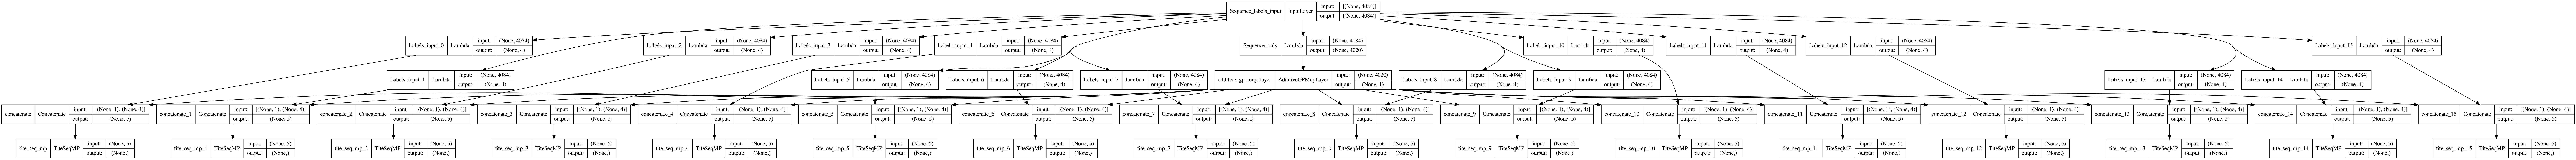

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [28]:

# Fit model to data
model.fit(learning_rate=.0003,
          epochs=500,
          batch_size=300,
          try_tqdm = False,
          early_stopping=False,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/500
442/442 [==============================] - 24s 28ms/step - loss: 12274875.0000 - tite_seq_mp_loss: 1401907.3750 - tite_seq_mp_1_loss: 1193298.6250 - tite_seq_mp_2_loss: 1221022.7500 - tite_seq_mp_3_loss: 1530714.5000 - tite_seq_mp_4_loss: 1231434.0000 - tite_seq_mp_5_loss: 1227901.6250 - tite_seq_mp_6_loss: 1357395.1250 - tite_seq_mp_7_loss: 890488.1875 - tite_seq_mp_8_loss: 621368.6250 - tite_seq_mp_9_loss: 329184.0000 - tite_seq_mp_10_loss: 219552.5000 - tite_seq_mp_11_loss: 344905.4688 - tite_seq_mp_12_loss: 193578.1562 - tite_seq_mp_13_loss: 140636.0469 - tite_seq_mp_14_loss: 157703.7344 - tite_seq_mp_15_loss: 213782.1406 - I_var: -5.5862 - val_loss: 12098673.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 1173511.7500 - val_tite_seq_mp_2_loss: 1173339.6250 - val_tite_seq_mp_3_loss: 1432822.7500 - val_tite_seq_mp_4_loss: 1197202.2500 - val_tite_seq_mp_5_loss: 1406460.6250 - val_tite_seq_mp_6_loss: 1272937.1250 - val_tite_seq_mp_7_loss: 803924.3750 - 

442/442 [==============================] - 5s 11ms/step - loss: 12117008.0000 - tite_seq_mp_loss: 1402407.1250 - tite_seq_mp_1_loss: 1169091.5000 - tite_seq_mp_2_loss: 1196183.3750 - tite_seq_mp_3_loss: 1575632.7500 - tite_seq_mp_4_loss: 1202726.3750 - tite_seq_mp_5_loss: 1203841.5000 - tite_seq_mp_6_loss: 1342054.5000 - tite_seq_mp_7_loss: 863054.0625 - tite_seq_mp_8_loss: 606635.3750 - tite_seq_mp_9_loss: 310717.2500 - tite_seq_mp_10_loss: 214090.1719 - tite_seq_mp_11_loss: 331501.2188 - tite_seq_mp_12_loss: 183400.7031 - tite_seq_mp_13_loss: 137681.2656 - tite_seq_mp_14_loss: 156672.6406 - tite_seq_mp_15_loss: 221326.3594 - I_var: -5.8041 - val_loss: 12360994.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 1192003.1250 - val_tite_seq_mp_2_loss: 1314547.6250 - val_tite_seq_mp_3_loss: 1320782.8750 - val_tite_seq_mp_4_loss: 1159079.2500 - val_tite_seq_mp_5_loss: 1413150.0000 - val_tite_seq_mp_6_loss: 1275692.5000 - val_tite_seq_mp_7_loss: 1061200.3750 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 10933845.0000 - tite_seq_mp_loss: 1402504.0000 - tite_seq_mp_1_loss: 1106221.0000 - tite_seq_mp_2_loss: 1132897.8750 - tite_seq_mp_3_loss: 1246959.7500 - tite_seq_mp_4_loss: 1154848.8750 - tite_seq_mp_5_loss: 1135619.0000 - tite_seq_mp_6_loss: 1265525.7500 - tite_seq_mp_7_loss: 789390.7500 - tite_seq_mp_8_loss: 491709.0625 - tite_seq_mp_9_loss: 223567.8906 - tite_seq_mp_10_loss: 178453.9062 - tite_seq_mp_11_loss: 269545.7500 - tite_seq_mp_12_loss: 147482.9531 - tite_seq_mp_13_loss: 97143.5391 - tite_seq_mp_14_loss: 126669.6094 - tite_seq_mp_15_loss: 165308.3594 - I_var: -4.0967 - val_loss: 10834854.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 1103224.0000 - val_tite_seq_mp_2_loss: 1124073.3750 - val_tite_seq_mp_3_loss: 1240606.2500 - val_tite_seq_mp_4_loss: 1146317.1250 - val_tite_seq_mp_5_loss: 1132098.3750 - val_tite_seq_mp_6_loss: 1245583.8750 - val_tite_seq_mp_7_loss: 775484.6250 - val_tite_seq_m

442/442 [==============================] - 5s 10ms/step - loss: 10467232.0000 - tite_seq_mp_loss: 1402569.2500 - tite_seq_mp_1_loss: 1081608.8750 - tite_seq_mp_2_loss: 1106143.5000 - tite_seq_mp_3_loss: 1172952.7500 - tite_seq_mp_4_loss: 1131619.0000 - tite_seq_mp_5_loss: 1104396.5000 - tite_seq_mp_6_loss: 1235423.3750 - tite_seq_mp_7_loss: 755581.8125 - tite_seq_mp_8_loss: 448403.8438 - tite_seq_mp_9_loss: 175246.1875 - tite_seq_mp_10_loss: 150420.7656 - tite_seq_mp_11_loss: 237465.6562 - tite_seq_mp_12_loss: 128307.7344 - tite_seq_mp_13_loss: 80312.7734 - tite_seq_mp_14_loss: 112093.6875 - tite_seq_mp_15_loss: 144683.4688 - I_var: -3.4694 - val_loss: 10378295.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 1079278.8750 - val_tite_seq_mp_2_loss: 1099120.3750 - val_tite_seq_mp_3_loss: 1166264.1250 - val_tite_seq_mp_4_loss: 1124876.3750 - val_tite_seq_mp_5_loss: 1100888.0000 - val_tite_seq_mp_6_loss: 1213924.1250 - val_tite_seq_mp_7_loss: 741261.3125 - val_tite_seq_m

Epoch 25/500
442/442 [==============================] - 6s 15ms/step - loss: 8420284.0000 - tite_seq_mp_loss: 1402596.1250 - tite_seq_mp_1_loss: 1058375.2500 - tite_seq_mp_2_loss: 969232.0000 - tite_seq_mp_3_loss: 647519.5000 - tite_seq_mp_4_loss: 1108813.8750 - tite_seq_mp_5_loss: 1036530.7500 - tite_seq_mp_6_loss: 588135.3750 - tite_seq_mp_7_loss: 512645.8125 - tite_seq_mp_8_loss: 407898.9375 - tite_seq_mp_9_loss: 128449.7422 - tite_seq_mp_10_loss: 95693.1797 - tite_seq_mp_11_loss: 150638.9531 - tite_seq_mp_12_loss: 86079.8516 - tite_seq_mp_13_loss: 59040.6562 - tite_seq_mp_14_loss: 72867.8125 - tite_seq_mp_15_loss: 95764.3516 - I_var: -1.9858 - val_loss: 7313464.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 1057156.1250 - val_tite_seq_mp_2_loss: 388541.0625 - val_tite_seq_mp_3_loss: 477033.8438 - val_tite_seq_mp_4_loss: 1102837.0000 - val_tite_seq_mp_5_loss: 1071182.3750 - val_tite_seq_mp_6_loss: 438735.1250 - val_tite_seq_mp_7_loss: 302721.4688 - val_tite_seq_

442/442 [==============================] - 5s 11ms/step - loss: 4290063.5000 - tite_seq_mp_loss: 1402360.3750 - tite_seq_mp_1_loss: 305014.6562 - tite_seq_mp_2_loss: 307628.9688 - tite_seq_mp_3_loss: 329302.6875 - tite_seq_mp_4_loss: 358421.6875 - tite_seq_mp_5_loss: 321969.2188 - tite_seq_mp_6_loss: 335739.1250 - tite_seq_mp_7_loss: 240653.7812 - tite_seq_mp_8_loss: 191519.8906 - tite_seq_mp_9_loss: 93521.7734 - tite_seq_mp_10_loss: 66753.9922 - tite_seq_mp_11_loss: 105529.0156 - tite_seq_mp_12_loss: 62888.2930 - tite_seq_mp_13_loss: 44402.1484 - tite_seq_mp_14_loss: 53768.7227 - tite_seq_mp_15_loss: 70588.8203 - I_var: -1.2077 - val_loss: 4202125.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 297960.5000 - val_tite_seq_mp_2_loss: 298698.4375 - val_tite_seq_mp_3_loss: 319727.0625 - val_tite_seq_mp_4_loss: 344633.0312 - val_tite_seq_mp_5_loss: 315200.8438 - val_tite_seq_mp_6_loss: 324876.2812 - val_tite_seq_mp_7_loss: 231060.6250 - val_tite_seq_mp_8_loss: 182241.79

442/442 [==============================] - 6s 12ms/step - loss: 3546807.0000 - tite_seq_mp_loss: 1402763.0000 - tite_seq_mp_1_loss: 224656.1406 - tite_seq_mp_2_loss: 225601.2969 - tite_seq_mp_3_loss: 228770.7656 - tite_seq_mp_4_loss: 267780.2812 - tite_seq_mp_5_loss: 238456.0156 - tite_seq_mp_6_loss: 244465.2031 - tite_seq_mp_7_loss: 179568.7969 - tite_seq_mp_8_loss: 143658.9375 - tite_seq_mp_9_loss: 70064.9844 - tite_seq_mp_10_loss: 56182.0977 - tite_seq_mp_11_loss: 83867.3906 - tite_seq_mp_12_loss: 50194.0625 - tite_seq_mp_13_loss: 34095.3203 - tite_seq_mp_14_loss: 42286.7109 - tite_seq_mp_15_loss: 54394.3477 - I_var: -0.7103 - val_loss: 3479462.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 217771.2812 - val_tite_seq_mp_2_loss: 217882.2812 - val_tite_seq_mp_3_loss: 221353.5625 - val_tite_seq_mp_4_loss: 259290.5000 - val_tite_seq_mp_5_loss: 232231.3281 - val_tite_seq_mp_6_loss: 234904.5625 - val_tite_seq_mp_7_loss: 172262.2344 - val_tite_seq_mp_8_loss: 138014.375

442/442 [==============================] - 6s 13ms/step - loss: 2993697.5000 - tite_seq_mp_loss: 1402253.0000 - tite_seq_mp_1_loss: 158682.7188 - tite_seq_mp_2_loss: 159974.6094 - tite_seq_mp_3_loss: 163519.1094 - tite_seq_mp_4_loss: 190487.0625 - tite_seq_mp_5_loss: 170445.4375 - tite_seq_mp_6_loss: 173023.6406 - tite_seq_mp_7_loss: 133226.4375 - tite_seq_mp_8_loss: 108442.9688 - tite_seq_mp_9_loss: 58279.0859 - tite_seq_mp_10_loss: 52876.9414 - tite_seq_mp_11_loss: 72785.4141 - tite_seq_mp_12_loss: 42918.5977 - tite_seq_mp_13_loss: 28487.6602 - tite_seq_mp_14_loss: 34955.6484 - tite_seq_mp_15_loss: 43339.3008 - I_var: -0.3637 - val_loss: 2948021.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 153557.8125 - val_tite_seq_mp_2_loss: 154305.8594 - val_tite_seq_mp_3_loss: 159093.1562 - val_tite_seq_mp_4_loss: 183734.6406 - val_tite_seq_mp_5_loss: 165631.8438 - val_tite_seq_mp_6_loss: 165923.6406 - val_tite_seq_mp_7_loss: 128043.1641 - val_tite_seq_mp_8_loss: 104435.367

442/442 [==============================] - 5s 11ms/step - loss: 2683307.0000 - tite_seq_mp_loss: 1402859.0000 - tite_seq_mp_1_loss: 115046.5938 - tite_seq_mp_2_loss: 117251.7500 - tite_seq_mp_3_loss: 133983.2656 - tite_seq_mp_4_loss: 135056.1562 - tite_seq_mp_5_loss: 127623.8359 - tite_seq_mp_6_loss: 131199.7031 - tite_seq_mp_7_loss: 108698.0312 - tite_seq_mp_8_loss: 89456.1875 - tite_seq_mp_9_loss: 55935.0586 - tite_seq_mp_10_loss: 52555.7344 - tite_seq_mp_11_loss: 70919.0469 - tite_seq_mp_12_loss: 41456.3828 - tite_seq_mp_13_loss: 27743.5117 - tite_seq_mp_14_loss: 33297.6914 - tite_seq_mp_15_loss: 40224.7266 - I_var: -0.2680 - val_loss: 2654870.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 111700.7266 - val_tite_seq_mp_2_loss: 113509.6094 - val_tite_seq_mp_3_loss: 131371.0625 - val_tite_seq_mp_4_loss: 130611.7109 - val_tite_seq_mp_5_loss: 124532.7656 - val_tite_seq_mp_6_loss: 126615.5078 - val_tite_seq_mp_7_loss: 105429.3359 - val_tite_seq_mp_8_loss: 87066.6328 

442/442 [==============================] - 7s 16ms/step - loss: 2553346.7500 - tite_seq_mp_loss: 1402590.6250 - tite_seq_mp_1_loss: 92764.3438 - tite_seq_mp_2_loss: 95780.9688 - tite_seq_mp_3_loss: 124012.0859 - tite_seq_mp_4_loss: 106260.4297 - tite_seq_mp_5_loss: 108766.4766 - tite_seq_mp_6_loss: 115273.2969 - tite_seq_mp_7_loss: 101769.7891 - tite_seq_mp_8_loss: 84344.6562 - tite_seq_mp_9_loss: 55833.9023 - tite_seq_mp_10_loss: 52537.6680 - tite_seq_mp_11_loss: 70867.3672 - tite_seq_mp_12_loss: 41411.1602 - tite_seq_mp_13_loss: 27737.6816 - tite_seq_mp_14_loss: 33270.2500 - tite_seq_mp_15_loss: 40127.3359 - I_var: -0.2701 - val_loss: 2534488.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 90623.0625 - val_tite_seq_mp_2_loss: 93325.7812 - val_tite_seq_mp_3_loss: 121958.5625 - val_tite_seq_mp_4_loss: 103703.3828 - val_tite_seq_mp_5_loss: 106846.4297 - val_tite_seq_mp_6_loss: 112165.3594 - val_tite_seq_mp_7_loss: 99345.8984 - val_tite_seq_mp_8_loss: 82710.9609 - val

442/442 [==============================] - 5s 12ms/step - loss: 2515604.7500 - tite_seq_mp_loss: 1402748.3750 - tite_seq_mp_1_loss: 84826.1172 - tite_seq_mp_2_loss: 88469.8516 - tite_seq_mp_3_loss: 121321.3906 - tite_seq_mp_4_loss: 96369.2656 - tite_seq_mp_5_loss: 103535.7266 - tite_seq_mp_6_loss: 111826.8906 - tite_seq_mp_7_loss: 100900.2656 - tite_seq_mp_8_loss: 83810.0859 - tite_seq_mp_9_loss: 55834.0938 - tite_seq_mp_10_loss: 52536.1719 - tite_seq_mp_11_loss: 70871.6016 - tite_seq_mp_12_loss: 41414.8867 - tite_seq_mp_13_loss: 27739.1797 - tite_seq_mp_14_loss: 33271.5469 - tite_seq_mp_15_loss: 40129.3516 - I_var: -0.2704 - val_loss: 2499264.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 83155.4531 - val_tite_seq_mp_2_loss: 86526.6016 - val_tite_seq_mp_3_loss: 119275.2969 - val_tite_seq_mp_4_loss: 94605.8125 - val_tite_seq_mp_5_loss: 101957.7422 - val_tite_seq_mp_6_loss: 109104.8359 - val_tite_seq_mp_7_loss: 98563.9844 - val_tite_seq_mp_8_loss: 82266.0703 - val_t

442/442 [==============================] - 5s 11ms/step - loss: 2472343.7500 - tite_seq_mp_loss: 1402812.0000 - tite_seq_mp_1_loss: 74881.3359 - tite_seq_mp_2_loss: 76913.4141 - tite_seq_mp_3_loss: 111589.5156 - tite_seq_mp_4_loss: 89308.5000 - tite_seq_mp_5_loss: 100412.8047 - tite_seq_mp_6_loss: 110414.9531 - tite_seq_mp_7_loss: 100536.2656 - tite_seq_mp_8_loss: 83701.3125 - tite_seq_mp_9_loss: 55819.0820 - tite_seq_mp_10_loss: 52537.4688 - tite_seq_mp_11_loss: 70869.8438 - tite_seq_mp_12_loss: 41404.5938 - tite_seq_mp_13_loss: 27739.3926 - tite_seq_mp_14_loss: 33272.2109 - tite_seq_mp_15_loss: 40129.4180 - I_var: -0.2698 - val_loss: 2454634.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 73838.5703 - val_tite_seq_mp_2_loss: 74887.4453 - val_tite_seq_mp_3_loss: 108815.2578 - val_tite_seq_mp_4_loss: 87024.6250 - val_tite_seq_mp_5_loss: 98471.6172 - val_tite_seq_mp_6_loss: 107531.1484 - val_tite_seq_mp_7_loss: 98134.3906 - val_tite_seq_mp_8_loss: 82144.7188 - val_ti

442/442 [==============================] - 5s 11ms/step - loss: 2417145.0000 - tite_seq_mp_loss: 1402554.8750 - tite_seq_mp_1_loss: 66252.8359 - tite_seq_mp_2_loss: 67826.4844 - tite_seq_mp_3_loss: 99941.0312 - tite_seq_mp_4_loss: 78440.1250 - tite_seq_mp_5_loss: 92963.2578 - tite_seq_mp_6_loss: 105797.2891 - tite_seq_mp_7_loss: 98690.2812 - tite_seq_mp_8_loss: 83084.9375 - tite_seq_mp_9_loss: 55669.0703 - tite_seq_mp_10_loss: 52514.3164 - tite_seq_mp_11_loss: 70863.3984 - tite_seq_mp_12_loss: 41412.6602 - tite_seq_mp_13_loss: 27738.8047 - tite_seq_mp_14_loss: 33269.5156 - tite_seq_mp_15_loss: 40126.9062 - I_var: -0.2672 - val_loss: 2402918.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 63335.8477 - val_tite_seq_mp_2_loss: 65884.2656 - val_tite_seq_mp_3_loss: 98441.6797 - val_tite_seq_mp_4_loss: 77623.5781 - val_tite_seq_mp_5_loss: 92169.3359 - val_tite_seq_mp_6_loss: 103618.6172 - val_tite_seq_mp_7_loss: 96577.5703 - val_tite_seq_mp_8_loss: 81637.3828 - val_tite_s

442/442 [==============================] - 5s 10ms/step - loss: 2361694.5000 - tite_seq_mp_loss: 1402841.2500 - tite_seq_mp_1_loss: 58774.5000 - tite_seq_mp_2_loss: 61358.5898 - tite_seq_mp_3_loss: 91020.1016 - tite_seq_mp_4_loss: 68738.9141 - tite_seq_mp_5_loss: 83730.7812 - tite_seq_mp_6_loss: 98100.8984 - tite_seq_mp_7_loss: 94709.1250 - tite_seq_mp_8_loss: 81431.9297 - tite_seq_mp_9_loss: 55181.2500 - tite_seq_mp_10_loss: 52422.7773 - tite_seq_mp_11_loss: 70833.0234 - tite_seq_mp_12_loss: 41412.5000 - tite_seq_mp_13_loss: 27739.0488 - tite_seq_mp_14_loss: 33271.7188 - tite_seq_mp_15_loss: 40130.0039 - I_var: -0.2652 - val_loss: 2351379.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 58816.0234 - val_tite_seq_mp_2_loss: 61278.0391 - val_tite_seq_mp_3_loss: 90618.5469 - val_tite_seq_mp_4_loss: 67894.4141 - val_tite_seq_mp_5_loss: 82339.2812 - val_tite_seq_mp_6_loss: 95350.1250 - val_tite_seq_mp_7_loss: 92261.2500 - val_tite_seq_mp_8_loss: 79862.0469 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2312114.0000 - tite_seq_mp_loss: 1403057.1250 - tite_seq_mp_1_loss: 53654.3320 - tite_seq_mp_2_loss: 57236.4805 - tite_seq_mp_3_loss: 84322.5547 - tite_seq_mp_4_loss: 61687.9609 - tite_seq_mp_5_loss: 75260.2422 - tite_seq_mp_6_loss: 89208.8359 - tite_seq_mp_7_loss: 89041.7188 - tite_seq_mp_8_loss: 78644.5938 - tite_seq_mp_9_loss: 54243.8438 - tite_seq_mp_10_loss: 52393.7305 - tite_seq_mp_11_loss: 70783.6250 - tite_seq_mp_12_loss: 41430.7852 - tite_seq_mp_13_loss: 27743.0879 - tite_seq_mp_14_loss: 33273.2148 - tite_seq_mp_15_loss: 40130.7930 - I_var: -0.2746 - val_loss: 2304446.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 53099.6328 - val_tite_seq_mp_2_loss: 56860.0273 - val_tite_seq_mp_3_loss: 83934.4766 - val_tite_seq_mp_4_loss: 61312.0312 - val_tite_seq_mp_5_loss: 74730.8906 - val_tite_seq_mp_6_loss: 87528.8125 - val_tite_seq_mp_7_loss: 87363.6406 - val_tite_seq_mp_8_loss: 77525.0625 - val_tite_seq

442/442 [==============================] - 5s 12ms/step - loss: 2267344.7500 - tite_seq_mp_loss: 1402034.2500 - tite_seq_mp_1_loss: 49906.6484 - tite_seq_mp_2_loss: 54236.5742 - tite_seq_mp_3_loss: 79019.1016 - tite_seq_mp_4_loss: 56730.7852 - tite_seq_mp_5_loss: 68415.2578 - tite_seq_mp_6_loss: 80818.4922 - tite_seq_mp_7_loss: 82717.8594 - tite_seq_mp_8_loss: 75068.7188 - tite_seq_mp_9_loss: 52909.9219 - tite_seq_mp_10_loss: 52028.3516 - tite_seq_mp_11_loss: 70768.8125 - tite_seq_mp_12_loss: 41488.0234 - tite_seq_mp_13_loss: 27765.0996 - tite_seq_mp_14_loss: 33288.7383 - tite_seq_mp_15_loss: 40147.0195 - I_var: -0.2702 - val_loss: 2265078.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 50271.4102 - val_tite_seq_mp_2_loss: 54606.5859 - val_tite_seq_mp_3_loss: 79626.8047 - val_tite_seq_mp_4_loss: 57013.9453 - val_tite_seq_mp_5_loss: 68318.7500 - val_tite_seq_mp_6_loss: 79189.7422 - val_tite_seq_mp_7_loss: 80974.9531 - val_tite_seq_mp_8_loss: 74082.3281 - val_tite_seq

442/442 [==============================] - 6s 13ms/step - loss: 2232751.7500 - tite_seq_mp_loss: 1402306.8750 - tite_seq_mp_1_loss: 47485.6055 - tite_seq_mp_2_loss: 52254.0508 - tite_seq_mp_3_loss: 74952.3047 - tite_seq_mp_4_loss: 53539.1172 - tite_seq_mp_5_loss: 63599.0078 - tite_seq_mp_6_loss: 74037.2734 - tite_seq_mp_7_loss: 76596.7344 - tite_seq_mp_8_loss: 71195.3828 - tite_seq_mp_9_loss: 51348.6133 - tite_seq_mp_10_loss: 51641.7617 - tite_seq_mp_11_loss: 70783.5547 - tite_seq_mp_12_loss: 41634.3398 - tite_seq_mp_13_loss: 27828.1348 - tite_seq_mp_14_loss: 33338.4609 - tite_seq_mp_15_loss: 40207.9766 - I_var: -0.2780 - val_loss: 2237760.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 49432.2461 - val_tite_seq_mp_2_loss: 54085.4258 - val_tite_seq_mp_3_loss: 77739.3672 - val_tite_seq_mp_4_loss: 55313.9375 - val_tite_seq_mp_5_loss: 64685.0625 - val_tite_seq_mp_6_loss: 72716.2812 - val_tite_seq_mp_7_loss: 74269.8438 - val_tite_seq_mp_8_loss: 69657.8516 - val_tite_seq

442/442 [==============================] - 7s 17ms/step - loss: 2206532.2500 - tite_seq_mp_loss: 1401856.3750 - tite_seq_mp_1_loss: 45895.9844 - tite_seq_mp_2_loss: 50929.3125 - tite_seq_mp_3_loss: 71908.8438 - tite_seq_mp_4_loss: 51440.8555 - tite_seq_mp_5_loss: 60424.3125 - tite_seq_mp_6_loss: 69194.0781 - tite_seq_mp_7_loss: 71506.6094 - tite_seq_mp_8_loss: 67570.3438 - tite_seq_mp_9_loss: 49758.7617 - tite_seq_mp_10_loss: 51470.4688 - tite_seq_mp_11_loss: 70921.0625 - tite_seq_mp_12_loss: 42034.1484 - tite_seq_mp_13_loss: 27908.3203 - tite_seq_mp_14_loss: 33437.7188 - tite_seq_mp_15_loss: 40273.3984 - I_var: -0.2776 - val_loss: 2212761.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 46595.8203 - val_tite_seq_mp_2_loss: 51762.4922 - val_tite_seq_mp_3_loss: 73351.0391 - val_tite_seq_mp_4_loss: 52435.8945 - val_tite_seq_mp_5_loss: 61262.7305 - val_tite_seq_mp_6_loss: 68868.7578 - val_tite_seq_mp_7_loss: 70392.1562 - val_tite_seq_mp_8_loss: 67074.6797 - val_tite_seq

442/442 [==============================] - 10s 23ms/step - loss: 2188022.7500 - tite_seq_mp_loss: 1402700.8750 - tite_seq_mp_1_loss: 44861.1719 - tite_seq_mp_2_loss: 50045.1484 - tite_seq_mp_3_loss: 69657.8984 - tite_seq_mp_4_loss: 49990.5820 - tite_seq_mp_5_loss: 58122.8398 - tite_seq_mp_6_loss: 65678.0391 - tite_seq_mp_7_loss: 67451.5781 - tite_seq_mp_8_loss: 64361.5078 - tite_seq_mp_9_loss: 48231.2500 - tite_seq_mp_10_loss: 51154.2461 - tite_seq_mp_11_loss: 71396.8359 - tite_seq_mp_12_loss: 42319.7773 - tite_seq_mp_13_loss: 28039.0625 - tite_seq_mp_14_loss: 33594.7539 - tite_seq_mp_15_loss: 40415.2891 - I_var: -0.2815 - val_loss: 2196282.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 45205.5117 - val_tite_seq_mp_2_loss: 50523.0664 - val_tite_seq_mp_3_loss: 70642.5703 - val_tite_seq_mp_4_loss: 50842.8398 - val_tite_seq_mp_5_loss: 58938.4805 - val_tite_seq_mp_6_loss: 65939.4375 - val_tite_seq_mp_7_loss: 67244.2656 - val_tite_seq_mp_8_loss: 64962.9844 - val_tite_se

442/442 [==============================] - 9s 21ms/step - loss: 2174052.2500 - tite_seq_mp_loss: 1402334.2500 - tite_seq_mp_1_loss: 44099.5312 - tite_seq_mp_2_loss: 49362.7695 - tite_seq_mp_3_loss: 68028.6641 - tite_seq_mp_4_loss: 49004.3711 - tite_seq_mp_5_loss: 56597.2188 - tite_seq_mp_6_loss: 63296.6836 - tite_seq_mp_7_loss: 64389.7617 - tite_seq_mp_8_loss: 61776.0586 - tite_seq_mp_9_loss: 46938.2227 - tite_seq_mp_10_loss: 51035.3477 - tite_seq_mp_11_loss: 71829.7812 - tite_seq_mp_12_loss: 42769.6211 - tite_seq_mp_13_loss: 28221.9961 - tite_seq_mp_14_loss: 33759.7656 - tite_seq_mp_15_loss: 40604.6719 - I_var: -0.2824 - val_loss: 2185564.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 44882.3047 - val_tite_seq_mp_2_loss: 50212.9297 - val_tite_seq_mp_3_loss: 69599.7188 - val_tite_seq_mp_4_loss: 50140.1055 - val_tite_seq_mp_5_loss: 57886.8672 - val_tite_seq_mp_6_loss: 63716.8398 - val_tite_seq_mp_7_loss: 64109.8828 - val_tite_seq_mp_8_loss: 62092.2734 - val_tite_seq

442/442 [==============================] - 9s 21ms/step - loss: 2162573.7500 - tite_seq_mp_loss: 1401439.6250 - tite_seq_mp_1_loss: 43605.4219 - tite_seq_mp_2_loss: 48870.8516 - tite_seq_mp_3_loss: 66755.0625 - tite_seq_mp_4_loss: 48254.9961 - tite_seq_mp_5_loss: 55279.1484 - tite_seq_mp_6_loss: 61360.1094 - tite_seq_mp_7_loss: 62028.9570 - tite_seq_mp_8_loss: 59629.3438 - tite_seq_mp_9_loss: 45794.1289 - tite_seq_mp_10_loss: 51007.5625 - tite_seq_mp_11_loss: 72052.1641 - tite_seq_mp_12_loss: 43189.9922 - tite_seq_mp_13_loss: 28401.6602 - tite_seq_mp_14_loss: 34077.7188 - tite_seq_mp_15_loss: 40825.1719 - I_var: -0.2953 - val_loss: 2183546.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 44918.4648 - val_tite_seq_mp_2_loss: 50250.3320 - val_tite_seq_mp_3_loss: 69233.9219 - val_tite_seq_mp_4_loss: 49995.8555 - val_tite_seq_mp_5_loss: 57474.1992 - val_tite_seq_mp_6_loss: 62786.4961 - val_tite_seq_mp_7_loss: 61991.4453 - val_tite_seq_mp_8_loss: 59815.6367 - val_tite_seq

442/442 [==============================] - 10s 22ms/step - loss: 2155776.7500 - tite_seq_mp_loss: 1402545.7500 - tite_seq_mp_1_loss: 43169.4297 - tite_seq_mp_2_loss: 48531.6641 - tite_seq_mp_3_loss: 65760.2344 - tite_seq_mp_4_loss: 47773.3438 - tite_seq_mp_5_loss: 54305.4766 - tite_seq_mp_6_loss: 60028.3828 - tite_seq_mp_7_loss: 60119.7305 - tite_seq_mp_8_loss: 57853.6133 - tite_seq_mp_9_loss: 44833.5234 - tite_seq_mp_10_loss: 50918.9102 - tite_seq_mp_11_loss: 72389.1797 - tite_seq_mp_12_loss: 43555.7109 - tite_seq_mp_13_loss: 28576.2188 - tite_seq_mp_14_loss: 34285.4805 - tite_seq_mp_15_loss: 41127.8828 - I_var: -0.3014 - val_loss: 2174468.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 43828.5781 - val_tite_seq_mp_2_loss: 49290.2305 - val_tite_seq_mp_3_loss: 67342.1562 - val_tite_seq_mp_4_loss: 48847.5469 - val_tite_seq_mp_5_loss: 55865.0469 - val_tite_seq_mp_6_loss: 61280.0078 - val_tite_seq_mp_7_loss: 60985.6914 - val_tite_seq_mp_8_loss: 59557.1992 - val_tite_se

442/442 [==============================] - 12s 28ms/step - loss: 2150807.7500 - tite_seq_mp_loss: 1402671.1250 - tite_seq_mp_1_loss: 42852.7617 - tite_seq_mp_2_loss: 48272.7773 - tite_seq_mp_3_loss: 65115.4023 - tite_seq_mp_4_loss: 47366.4453 - tite_seq_mp_5_loss: 53663.9961 - tite_seq_mp_6_loss: 59076.2422 - tite_seq_mp_7_loss: 59055.2344 - tite_seq_mp_8_loss: 56790.9883 - tite_seq_mp_9_loss: 44218.7070 - tite_seq_mp_10_loss: 50887.7148 - tite_seq_mp_11_loss: 72525.2578 - tite_seq_mp_12_loss: 43868.1914 - tite_seq_mp_13_loss: 28736.6113 - tite_seq_mp_14_loss: 34494.1094 - tite_seq_mp_15_loss: 41209.0156 - I_var: -0.3210 - val_loss: 2171570.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 43557.4766 - val_tite_seq_mp_2_loss: 49027.5742 - val_tite_seq_mp_3_loss: 66853.1250 - val_tite_seq_mp_4_loss: 48453.4414 - val_tite_seq_mp_5_loss: 55426.0820 - val_tite_seq_mp_6_loss: 60409.4023 - val_tite_seq_mp_7_loss: 59731.7031 - val_tite_seq_mp_8_loss: 58256.3711 - val_tite_se

442/442 [==============================] - 12s 27ms/step - loss: 2148232.5000 - tite_seq_mp_loss: 1402504.5000 - tite_seq_mp_1_loss: 42734.2695 - tite_seq_mp_2_loss: 48136.8789 - tite_seq_mp_3_loss: 64685.5430 - tite_seq_mp_4_loss: 47132.2383 - tite_seq_mp_5_loss: 53244.8320 - tite_seq_mp_6_loss: 58445.1016 - tite_seq_mp_7_loss: 58236.3125 - tite_seq_mp_8_loss: 55977.2617 - tite_seq_mp_9_loss: 43782.9297 - tite_seq_mp_10_loss: 51142.2070 - tite_seq_mp_11_loss: 72842.5547 - tite_seq_mp_12_loss: 44321.7578 - tite_seq_mp_13_loss: 28885.6055 - tite_seq_mp_14_loss: 34613.9844 - tite_seq_mp_15_loss: 41544.5703 - I_var: -0.3164 - val_loss: 2171361.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 43716.3516 - val_tite_seq_mp_2_loss: 49199.1523 - val_tite_seq_mp_3_loss: 66891.4609 - val_tite_seq_mp_4_loss: 48498.2148 - val_tite_seq_mp_5_loss: 55398.2109 - val_tite_seq_mp_6_loss: 60095.2930 - val_tite_seq_mp_7_loss: 58988.3750 - val_tite_seq_mp_8_loss: 56986.8750 - val_tite_se

442/442 [==============================] - 8s 19ms/step - loss: 2144127.7500 - tite_seq_mp_loss: 1402486.3750 - tite_seq_mp_1_loss: 42550.7812 - tite_seq_mp_2_loss: 47946.6445 - tite_seq_mp_3_loss: 64131.6836 - tite_seq_mp_4_loss: 46804.0664 - tite_seq_mp_5_loss: 52745.6289 - tite_seq_mp_6_loss: 57817.7812 - tite_seq_mp_7_loss: 57388.8086 - tite_seq_mp_8_loss: 55123.2578 - tite_seq_mp_9_loss: 43298.1758 - tite_seq_mp_10_loss: 50668.7656 - tite_seq_mp_11_loss: 73038.0469 - tite_seq_mp_12_loss: 44521.3789 - tite_seq_mp_13_loss: 29022.1758 - tite_seq_mp_14_loss: 34837.1562 - tite_seq_mp_15_loss: 41743.6562 - I_var: -0.3201 - val_loss: 2168229.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 43424.5625 - val_tite_seq_mp_2_loss: 48942.0469 - val_tite_seq_mp_3_loss: 66188.9531 - val_tite_seq_mp_4_loss: 48165.9297 - val_tite_seq_mp_5_loss: 54805.4062 - val_tite_seq_mp_6_loss: 59525.3750 - val_tite_seq_mp_7_loss: 58106.7070 - val_tite_seq_mp_8_loss: 56363.7383 - val_tite_seq

442/442 [==============================] - 17s 39ms/step - loss: 2142472.2500 - tite_seq_mp_loss: 1402816.8750 - tite_seq_mp_1_loss: 42264.4102 - tite_seq_mp_2_loss: 47790.0508 - tite_seq_mp_3_loss: 63588.8320 - tite_seq_mp_4_loss: 46539.2383 - tite_seq_mp_5_loss: 52304.9141 - tite_seq_mp_6_loss: 57282.4141 - tite_seq_mp_7_loss: 56706.3477 - tite_seq_mp_8_loss: 54504.2188 - tite_seq_mp_9_loss: 42942.4102 - tite_seq_mp_10_loss: 50744.1602 - tite_seq_mp_11_loss: 73746.5938 - tite_seq_mp_12_loss: 44875.5625 - tite_seq_mp_13_loss: 29268.7305 - tite_seq_mp_14_loss: 35024.1328 - tite_seq_mp_15_loss: 42071.2188 - I_var: -0.3215 - val_loss: 2172504.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 43743.7070 - val_tite_seq_mp_2_loss: 49244.3398 - val_tite_seq_mp_3_loss: 66422.6875 - val_tite_seq_mp_4_loss: 48445.3516 - val_tite_seq_mp_5_loss: 55131.1211 - val_tite_seq_mp_6_loss: 59639.0898 - val_tite_seq_mp_7_loss: 57778.8516 - val_tite_seq_mp_8_loss: 55617.2852 - val_tite_se

442/442 [==============================] - 10s 22ms/step - loss: 2140409.7500 - tite_seq_mp_loss: 1402561.3750 - tite_seq_mp_1_loss: 42258.7070 - tite_seq_mp_2_loss: 47751.4922 - tite_seq_mp_3_loss: 63282.1602 - tite_seq_mp_4_loss: 46386.9922 - tite_seq_mp_5_loss: 52033.3633 - tite_seq_mp_6_loss: 56929.3398 - tite_seq_mp_7_loss: 56178.6914 - tite_seq_mp_8_loss: 54012.7539 - tite_seq_mp_9_loss: 42665.8047 - tite_seq_mp_10_loss: 50731.0938 - tite_seq_mp_11_loss: 73832.8359 - tite_seq_mp_12_loss: 45182.8281 - tite_seq_mp_13_loss: 29279.1621 - tite_seq_mp_14_loss: 35136.7305 - tite_seq_mp_15_loss: 42184.8906 - I_var: -0.3350 - val_loss: 2165986.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42992.2188 - val_tite_seq_mp_2_loss: 48579.4531 - val_tite_seq_mp_3_loss: 65226.2070 - val_tite_seq_mp_4_loss: 47656.5039 - val_tite_seq_mp_5_loss: 54042.3438 - val_tite_seq_mp_6_loss: 58610.5195 - val_tite_seq_mp_7_loss: 57190.2109 - val_tite_seq_mp_8_loss: 55739.8008 - val_tite_se

442/442 [==============================] - 12s 27ms/step - loss: 2137972.7500 - tite_seq_mp_loss: 1402372.8750 - tite_seq_mp_1_loss: 42021.2305 - tite_seq_mp_2_loss: 47558.4336 - tite_seq_mp_3_loss: 62828.8867 - tite_seq_mp_4_loss: 46139.7656 - tite_seq_mp_5_loss: 51612.1055 - tite_seq_mp_6_loss: 56418.0664 - tite_seq_mp_7_loss: 55618.0703 - tite_seq_mp_8_loss: 53474.5664 - tite_seq_mp_9_loss: 42388.8125 - tite_seq_mp_10_loss: 51084.7852 - tite_seq_mp_11_loss: 73927.3047 - tite_seq_mp_12_loss: 45274.0547 - tite_seq_mp_13_loss: 29488.9570 - tite_seq_mp_14_loss: 35359.9648 - tite_seq_mp_15_loss: 42401.4453 - I_var: -0.3428 - val_loss: 2165615.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 43087.8789 - val_tite_seq_mp_2_loss: 48581.1289 - val_tite_seq_mp_3_loss: 65009.8320 - val_tite_seq_mp_4_loss: 47478.7656 - val_tite_seq_mp_5_loss: 53826.7969 - val_tite_seq_mp_6_loss: 58368.2148 - val_tite_seq_mp_7_loss: 56781.6875 - val_tite_seq_mp_8_loss: 55064.2773 - val_tite_se

442/442 [==============================] - 13s 30ms/step - loss: 2136661.5000 - tite_seq_mp_loss: 1402547.7500 - tite_seq_mp_1_loss: 41910.7422 - tite_seq_mp_2_loss: 47408.6367 - tite_seq_mp_3_loss: 62424.9297 - tite_seq_mp_4_loss: 45976.1562 - tite_seq_mp_5_loss: 51294.8516 - tite_seq_mp_6_loss: 55980.7500 - tite_seq_mp_7_loss: 55155.0234 - tite_seq_mp_8_loss: 52977.3164 - tite_seq_mp_9_loss: 42172.3086 - tite_seq_mp_10_loss: 51205.9062 - tite_seq_mp_11_loss: 74263.6719 - tite_seq_mp_12_loss: 45555.9531 - tite_seq_mp_13_loss: 29730.6895 - tite_seq_mp_14_loss: 35511.4258 - tite_seq_mp_15_loss: 42541.3164 - I_var: -0.3444 - val_loss: 2164144.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42727.4219 - val_tite_seq_mp_2_loss: 48462.6797 - val_tite_seq_mp_3_loss: 64564.7617 - val_tite_seq_mp_4_loss: 47230.0352 - val_tite_seq_mp_5_loss: 53521.9141 - val_tite_seq_mp_6_loss: 58051.8750 - val_tite_seq_mp_7_loss: 56476.9453 - val_tite_seq_mp_8_loss: 55137.6914 - val_tite_se

442/442 [==============================] - 13s 30ms/step - loss: 2136171.0000 - tite_seq_mp_loss: 1402577.8750 - tite_seq_mp_1_loss: 41825.7617 - tite_seq_mp_2_loss: 47379.3945 - tite_seq_mp_3_loss: 62148.6602 - tite_seq_mp_4_loss: 45808.5156 - tite_seq_mp_5_loss: 51070.5547 - tite_seq_mp_6_loss: 55672.6406 - tite_seq_mp_7_loss: 54796.4258 - tite_seq_mp_8_loss: 52674.0312 - tite_seq_mp_9_loss: 41996.6445 - tite_seq_mp_10_loss: 51258.6094 - tite_seq_mp_11_loss: 74804.2734 - tite_seq_mp_12_loss: 45716.9180 - tite_seq_mp_13_loss: 29960.7754 - tite_seq_mp_14_loss: 35691.3906 - tite_seq_mp_15_loss: 42784.0742 - I_var: -0.3577 - val_loss: 2164462.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42772.3711 - val_tite_seq_mp_2_loss: 48430.5352 - val_tite_seq_mp_3_loss: 64490.9141 - val_tite_seq_mp_4_loss: 47318.0117 - val_tite_seq_mp_5_loss: 53446.4805 - val_tite_seq_mp_6_loss: 57716.5820 - val_tite_seq_mp_7_loss: 56000.5469 - val_tite_seq_mp_8_loss: 54519.0391 - val_tite_se

442/442 [==============================] - 10s 23ms/step - loss: 2135021.5000 - tite_seq_mp_loss: 1402294.6250 - tite_seq_mp_1_loss: 41784.4297 - tite_seq_mp_2_loss: 47369.0000 - tite_seq_mp_3_loss: 61866.8789 - tite_seq_mp_4_loss: 45739.4258 - tite_seq_mp_5_loss: 50885.3984 - tite_seq_mp_6_loss: 55425.8125 - tite_seq_mp_7_loss: 54498.1406 - tite_seq_mp_8_loss: 52449.0703 - tite_seq_mp_9_loss: 41920.5703 - tite_seq_mp_10_loss: 51237.6562 - tite_seq_mp_11_loss: 74719.1719 - tite_seq_mp_12_loss: 45915.8828 - tite_seq_mp_13_loss: 29985.3438 - tite_seq_mp_14_loss: 35962.9219 - tite_seq_mp_15_loss: 42963.6367 - I_var: -0.3608 - val_loss: 2162715.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42586.0508 - val_tite_seq_mp_2_loss: 48328.1875 - val_tite_seq_mp_3_loss: 64020.5664 - val_tite_seq_mp_4_loss: 47086.9180 - val_tite_seq_mp_5_loss: 53186.3242 - val_tite_seq_mp_6_loss: 57501.8828 - val_tite_seq_mp_7_loss: 55782.1289 - val_tite_seq_mp_8_loss: 54441.4805 - val_tite_se

442/442 [==============================] - 9s 19ms/step - loss: 2134354.2500 - tite_seq_mp_loss: 1402639.0000 - tite_seq_mp_1_loss: 41680.7070 - tite_seq_mp_2_loss: 47285.7969 - tite_seq_mp_3_loss: 61531.8867 - tite_seq_mp_4_loss: 45564.0625 - tite_seq_mp_5_loss: 50675.0938 - tite_seq_mp_6_loss: 55204.1836 - tite_seq_mp_7_loss: 54199.3125 - tite_seq_mp_8_loss: 52197.8750 - tite_seq_mp_9_loss: 41834.3984 - tite_seq_mp_10_loss: 51265.7344 - tite_seq_mp_11_loss: 75056.1094 - tite_seq_mp_12_loss: 46130.4727 - tite_seq_mp_13_loss: 30088.3770 - tite_seq_mp_14_loss: 35859.6797 - tite_seq_mp_15_loss: 43138.7109 - I_var: -0.3685 - val_loss: 2168836.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 43008.2461 - val_tite_seq_mp_2_loss: 48767.9180 - val_tite_seq_mp_3_loss: 64465.6992 - val_tite_seq_mp_4_loss: 47606.8555 - val_tite_seq_mp_5_loss: 53637.4805 - val_tite_seq_mp_6_loss: 57901.1016 - val_tite_seq_mp_7_loss: 55614.9492 - val_tite_seq_mp_8_loss: 53740.2383 - val_tite_seq

442/442 [==============================] - 10s 23ms/step - loss: 2133529.0000 - tite_seq_mp_loss: 1402441.0000 - tite_seq_mp_1_loss: 41631.3203 - tite_seq_mp_2_loss: 47274.0586 - tite_seq_mp_3_loss: 61360.1953 - tite_seq_mp_4_loss: 45489.3008 - tite_seq_mp_5_loss: 50579.3164 - tite_seq_mp_6_loss: 55019.7539 - tite_seq_mp_7_loss: 54002.3828 - tite_seq_mp_8_loss: 52036.1602 - tite_seq_mp_9_loss: 41758.4922 - tite_seq_mp_10_loss: 51425.6641 - tite_seq_mp_11_loss: 75046.9062 - tite_seq_mp_12_loss: 46143.3438 - tite_seq_mp_13_loss: 30195.8730 - tite_seq_mp_14_loss: 35973.7422 - tite_seq_mp_15_loss: 43146.8047 - I_var: -0.3647 - val_loss: 2162479.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42483.3086 - val_tite_seq_mp_2_loss: 48175.9336 - val_tite_seq_mp_3_loss: 63663.9062 - val_tite_seq_mp_4_loss: 46910.9531 - val_tite_seq_mp_5_loss: 52972.1523 - val_tite_seq_mp_6_loss: 57273.3945 - val_tite_seq_mp_7_loss: 55454.7969 - val_tite_seq_mp_8_loss: 54098.3984 - val_tite_se

442/442 [==============================] - 9s 20ms/step - loss: 2132761.2500 - tite_seq_mp_loss: 1402490.1250 - tite_seq_mp_1_loss: 41557.7539 - tite_seq_mp_2_loss: 47219.9023 - tite_seq_mp_3_loss: 61043.8086 - tite_seq_mp_4_loss: 45408.0742 - tite_seq_mp_5_loss: 50382.6641 - tite_seq_mp_6_loss: 54878.1562 - tite_seq_mp_7_loss: 53796.9375 - tite_seq_mp_8_loss: 51878.9023 - tite_seq_mp_9_loss: 41752.5938 - tite_seq_mp_10_loss: 51204.0195 - tite_seq_mp_11_loss: 75252.4375 - tite_seq_mp_12_loss: 46271.1914 - tite_seq_mp_13_loss: 30197.7695 - tite_seq_mp_14_loss: 36190.2148 - tite_seq_mp_15_loss: 43231.9258 - I_var: -0.3659 - val_loss: 2167464.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42674.5938 - val_tite_seq_mp_2_loss: 48244.4727 - val_tite_seq_mp_3_loss: 63561.9609 - val_tite_seq_mp_4_loss: 47003.0000 - val_tite_seq_mp_5_loss: 52972.0781 - val_tite_seq_mp_6_loss: 57199.7461 - val_tite_seq_mp_7_loss: 55194.8320 - val_tite_seq_mp_8_loss: 53717.9141 - val_tite_seq

442/442 [==============================] - 9s 19ms/step - loss: 2133768.2500 - tite_seq_mp_loss: 1402517.0000 - tite_seq_mp_1_loss: 41515.8711 - tite_seq_mp_2_loss: 47184.6680 - tite_seq_mp_3_loss: 60915.9727 - tite_seq_mp_4_loss: 45321.9727 - tite_seq_mp_5_loss: 50234.2031 - tite_seq_mp_6_loss: 54705.2031 - tite_seq_mp_7_loss: 53663.2656 - tite_seq_mp_8_loss: 51737.3164 - tite_seq_mp_9_loss: 41706.5508 - tite_seq_mp_10_loss: 51853.3789 - tite_seq_mp_11_loss: 75618.4453 - tite_seq_mp_12_loss: 46708.0312 - tite_seq_mp_13_loss: 30393.5879 - tite_seq_mp_14_loss: 36206.4727 - tite_seq_mp_15_loss: 43482.0977 - I_var: -0.3779 - val_loss: 2165167.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42403.3789 - val_tite_seq_mp_2_loss: 48115.1758 - val_tite_seq_mp_3_loss: 63287.6797 - val_tite_seq_mp_4_loss: 46860.4844 - val_tite_seq_mp_5_loss: 52613.7812 - val_tite_seq_mp_6_loss: 56909.2109 - val_tite_seq_mp_7_loss: 55289.7852 - val_tite_seq_mp_8_loss: 54167.0703 - val_tite_seq

442/442 [==============================] - 9s 20ms/step - loss: 2133063.0000 - tite_seq_mp_loss: 1402709.5000 - tite_seq_mp_1_loss: 41503.8516 - tite_seq_mp_2_loss: 47133.2461 - tite_seq_mp_3_loss: 60695.5430 - tite_seq_mp_4_loss: 45195.1406 - tite_seq_mp_5_loss: 50079.4414 - tite_seq_mp_6_loss: 54577.5625 - tite_seq_mp_7_loss: 53456.0273 - tite_seq_mp_8_loss: 51597.0352 - tite_seq_mp_9_loss: 41689.8594 - tite_seq_mp_10_loss: 51739.9219 - tite_seq_mp_11_loss: 75761.0703 - tite_seq_mp_12_loss: 46648.2305 - tite_seq_mp_13_loss: 30448.2734 - tite_seq_mp_14_loss: 36323.3750 - tite_seq_mp_15_loss: 43499.4648 - I_var: -0.3789 - val_loss: 2166416.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42371.4688 - val_tite_seq_mp_2_loss: 48156.7148 - val_tite_seq_mp_3_loss: 63098.6250 - val_tite_seq_mp_4_loss: 46773.1797 - val_tite_seq_mp_5_loss: 52650.0312 - val_tite_seq_mp_6_loss: 56835.3281 - val_tite_seq_mp_7_loss: 55171.6953 - val_tite_seq_mp_8_loss: 54450.2109 - val_tite_seq

442/442 [==============================] - 5s 12ms/step - loss: 2132745.7500 - tite_seq_mp_loss: 1402365.7500 - tite_seq_mp_1_loss: 41463.5234 - tite_seq_mp_2_loss: 47131.8086 - tite_seq_mp_3_loss: 60503.3203 - tite_seq_mp_4_loss: 45159.1680 - tite_seq_mp_5_loss: 50044.1641 - tite_seq_mp_6_loss: 54439.3594 - tite_seq_mp_7_loss: 53399.4883 - tite_seq_mp_8_loss: 51563.3086 - tite_seq_mp_9_loss: 41699.9375 - tite_seq_mp_10_loss: 51754.1797 - tite_seq_mp_11_loss: 76143.0312 - tite_seq_mp_12_loss: 46655.9727 - tite_seq_mp_13_loss: 30373.5859 - tite_seq_mp_14_loss: 36462.4727 - tite_seq_mp_15_loss: 43583.5117 - I_var: -0.3754 - val_loss: 2167000.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42482.6367 - val_tite_seq_mp_2_loss: 48249.5469 - val_tite_seq_mp_3_loss: 63097.8945 - val_tite_seq_mp_4_loss: 46743.1719 - val_tite_seq_mp_5_loss: 52477.4531 - val_tite_seq_mp_6_loss: 56803.4062 - val_tite_seq_mp_7_loss: 54825.4141 - val_tite_seq_mp_8_loss: 53506.7656 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2133292.7500 - tite_seq_mp_loss: 1402597.6250 - tite_seq_mp_1_loss: 41439.6641 - tite_seq_mp_2_loss: 47077.1562 - tite_seq_mp_3_loss: 60353.4609 - tite_seq_mp_4_loss: 45120.7578 - tite_seq_mp_5_loss: 49890.2734 - tite_seq_mp_6_loss: 54366.6406 - tite_seq_mp_7_loss: 53234.8242 - tite_seq_mp_8_loss: 51475.1992 - tite_seq_mp_9_loss: 41747.7500 - tite_seq_mp_10_loss: 52081.6992 - tite_seq_mp_11_loss: 76330.9297 - tite_seq_mp_12_loss: 46797.5508 - tite_seq_mp_13_loss: 30559.7637 - tite_seq_mp_14_loss: 36569.4375 - tite_seq_mp_15_loss: 43646.7852 - I_var: -0.3822 - val_loss: 2165795.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42323.1367 - val_tite_seq_mp_2_loss: 48130.2773 - val_tite_seq_mp_3_loss: 62820.7695 - val_tite_seq_mp_4_loss: 46774.5273 - val_tite_seq_mp_5_loss: 52321.3398 - val_tite_seq_mp_6_loss: 56664.8672 - val_tite_seq_mp_7_loss: 54763.0625 - val_tite_seq_mp_8_loss: 53698.2461 - val_tite_seq

442/442 [==============================] - 7s 17ms/step - loss: 2132787.2500 - tite_seq_mp_loss: 1402435.6250 - tite_seq_mp_1_loss: 41402.8477 - tite_seq_mp_2_loss: 47121.5625 - tite_seq_mp_3_loss: 60343.9531 - tite_seq_mp_4_loss: 45062.1914 - tite_seq_mp_5_loss: 49829.3555 - tite_seq_mp_6_loss: 54346.3008 - tite_seq_mp_7_loss: 53144.1406 - tite_seq_mp_8_loss: 51428.2734 - tite_seq_mp_9_loss: 41685.4375 - tite_seq_mp_10_loss: 51606.6719 - tite_seq_mp_11_loss: 76241.4375 - tite_seq_mp_12_loss: 46831.2500 - tite_seq_mp_13_loss: 30711.5898 - tite_seq_mp_14_loss: 36832.8203 - tite_seq_mp_15_loss: 43759.8398 - I_var: -0.3875 - val_loss: 2168134.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42485.5859 - val_tite_seq_mp_2_loss: 48334.0039 - val_tite_seq_mp_3_loss: 63096.9336 - val_tite_seq_mp_4_loss: 46694.0859 - val_tite_seq_mp_5_loss: 52451.4258 - val_tite_seq_mp_6_loss: 56968.8359 - val_tite_seq_mp_7_loss: 54553.7188 - val_tite_seq_mp_8_loss: 53577.4453 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2133382.2500 - tite_seq_mp_loss: 1402922.7500 - tite_seq_mp_1_loss: 41388.7695 - tite_seq_mp_2_loss: 47139.9648 - tite_seq_mp_3_loss: 60215.6953 - tite_seq_mp_4_loss: 45136.8789 - tite_seq_mp_5_loss: 49709.4453 - tite_seq_mp_6_loss: 54188.8398 - tite_seq_mp_7_loss: 53072.9492 - tite_seq_mp_8_loss: 51342.0547 - tite_seq_mp_9_loss: 41716.9062 - tite_seq_mp_10_loss: 51829.6758 - tite_seq_mp_11_loss: 76358.2422 - tite_seq_mp_12_loss: 46982.4648 - tite_seq_mp_13_loss: 30641.9570 - tite_seq_mp_14_loss: 36865.1914 - tite_seq_mp_15_loss: 43867.0000 - I_var: -0.3878 - val_loss: 2167387.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42281.0703 - val_tite_seq_mp_2_loss: 48218.6016 - val_tite_seq_mp_3_loss: 62756.7383 - val_tite_seq_mp_4_loss: 46556.4180 - val_tite_seq_mp_5_loss: 52274.0977 - val_tite_seq_mp_6_loss: 56605.6875 - val_tite_seq_mp_7_loss: 54612.6914 - val_tite_seq_mp_8_loss: 53652.3945 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2132665.0000 - tite_seq_mp_loss: 1402687.7500 - tite_seq_mp_1_loss: 41379.1992 - tite_seq_mp_2_loss: 47074.5312 - tite_seq_mp_3_loss: 60035.0664 - tite_seq_mp_4_loss: 44999.3203 - tite_seq_mp_5_loss: 49677.5312 - tite_seq_mp_6_loss: 54140.4258 - tite_seq_mp_7_loss: 53037.6602 - tite_seq_mp_8_loss: 51363.2305 - tite_seq_mp_9_loss: 41694.5234 - tite_seq_mp_10_loss: 51773.2617 - tite_seq_mp_11_loss: 76553.8125 - tite_seq_mp_12_loss: 47099.4492 - tite_seq_mp_13_loss: 30670.3613 - tite_seq_mp_14_loss: 36604.7617 - tite_seq_mp_15_loss: 43869.7852 - I_var: -0.4030 - val_loss: 2168369.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42328.4648 - val_tite_seq_mp_2_loss: 48355.7617 - val_tite_seq_mp_3_loss: 62713.1797 - val_tite_seq_mp_4_loss: 46651.7852 - val_tite_seq_mp_5_loss: 52276.6016 - val_tite_seq_mp_6_loss: 56668.8438 - val_tite_seq_mp_7_loss: 54551.3789 - val_tite_seq_mp_8_loss: 53472.5000 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2133007.5000 - tite_seq_mp_loss: 1402248.0000 - tite_seq_mp_1_loss: 41382.9766 - tite_seq_mp_2_loss: 47071.9883 - tite_seq_mp_3_loss: 59945.7344 - tite_seq_mp_4_loss: 44981.3125 - tite_seq_mp_5_loss: 49645.1523 - tite_seq_mp_6_loss: 54113.6875 - tite_seq_mp_7_loss: 53001.0820 - tite_seq_mp_8_loss: 51347.8438 - tite_seq_mp_9_loss: 41750.2930 - tite_seq_mp_10_loss: 52108.8867 - tite_seq_mp_11_loss: 76686.7109 - tite_seq_mp_12_loss: 47149.8711 - tite_seq_mp_13_loss: 30622.3809 - tite_seq_mp_14_loss: 36970.2266 - tite_seq_mp_15_loss: 43976.1836 - I_var: -0.3890 - val_loss: 2166998.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42272.6719 - val_tite_seq_mp_2_loss: 48284.2266 - val_tite_seq_mp_3_loss: 62587.6289 - val_tite_seq_mp_4_loss: 46606.3086 - val_tite_seq_mp_5_loss: 52112.1719 - val_tite_seq_mp_6_loss: 56672.8047 - val_tite_seq_mp_7_loss: 54716.2539 - val_tite_seq_mp_8_loss: 53988.2070 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2133260.7500 - tite_seq_mp_loss: 1402598.0000 - tite_seq_mp_1_loss: 41358.5117 - tite_seq_mp_2_loss: 47074.2305 - tite_seq_mp_3_loss: 59765.6953 - tite_seq_mp_4_loss: 44958.2344 - tite_seq_mp_5_loss: 49574.2891 - tite_seq_mp_6_loss: 54016.3711 - tite_seq_mp_7_loss: 52970.3516 - tite_seq_mp_8_loss: 51269.8242 - tite_seq_mp_9_loss: 41785.3359 - tite_seq_mp_10_loss: 52061.5898 - tite_seq_mp_11_loss: 76634.0859 - tite_seq_mp_12_loss: 47269.9375 - tite_seq_mp_13_loss: 30849.2559 - tite_seq_mp_14_loss: 37149.4609 - tite_seq_mp_15_loss: 43920.5039 - I_var: -0.3945 - val_loss: 2170037.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42248.1055 - val_tite_seq_mp_2_loss: 48286.9766 - val_tite_seq_mp_3_loss: 62388.1484 - val_tite_seq_mp_4_loss: 46511.4297 - val_tite_seq_mp_5_loss: 52171.7344 - val_tite_seq_mp_6_loss: 56585.5117 - val_tite_seq_mp_7_loss: 54537.7266 - val_tite_seq_mp_8_loss: 53600.0469 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2133001.2500 - tite_seq_mp_loss: 1402495.7500 - tite_seq_mp_1_loss: 41349.8672 - tite_seq_mp_2_loss: 47085.1719 - tite_seq_mp_3_loss: 59764.0742 - tite_seq_mp_4_loss: 44911.1836 - tite_seq_mp_5_loss: 49502.1250 - tite_seq_mp_6_loss: 54001.7383 - tite_seq_mp_7_loss: 52882.8672 - tite_seq_mp_8_loss: 51249.6719 - tite_seq_mp_9_loss: 41766.9336 - tite_seq_mp_10_loss: 52123.4805 - tite_seq_mp_11_loss: 76964.0781 - tite_seq_mp_12_loss: 47088.6445 - tite_seq_mp_13_loss: 30713.3535 - tite_seq_mp_14_loss: 37060.1836 - tite_seq_mp_15_loss: 44036.6055 - I_var: -0.4043 - val_loss: 2169227.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42375.6016 - val_tite_seq_mp_2_loss: 48300.8125 - val_tite_seq_mp_3_loss: 62303.7383 - val_tite_seq_mp_4_loss: 46517.9453 - val_tite_seq_mp_5_loss: 52091.7891 - val_tite_seq_mp_6_loss: 56604.3477 - val_tite_seq_mp_7_loss: 54540.4727 - val_tite_seq_mp_8_loss: 53619.4180 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2133547.7500 - tite_seq_mp_loss: 1402479.5000 - tite_seq_mp_1_loss: 41321.5234 - tite_seq_mp_2_loss: 47145.0859 - tite_seq_mp_3_loss: 59736.7148 - tite_seq_mp_4_loss: 44863.0273 - tite_seq_mp_5_loss: 49510.2852 - tite_seq_mp_6_loss: 53976.7344 - tite_seq_mp_7_loss: 52873.5078 - tite_seq_mp_8_loss: 51280.1602 - tite_seq_mp_9_loss: 41839.3477 - tite_seq_mp_10_loss: 52126.0742 - tite_seq_mp_11_loss: 77008.5703 - tite_seq_mp_12_loss: 47230.1562 - tite_seq_mp_13_loss: 30800.2402 - tite_seq_mp_14_loss: 37229.0000 - tite_seq_mp_15_loss: 44124.0078 - I_var: -0.3974 - val_loss: 2169969.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42444.3555 - val_tite_seq_mp_2_loss: 48270.4609 - val_tite_seq_mp_3_loss: 62434.5938 - val_tite_seq_mp_4_loss: 46485.2266 - val_tite_seq_mp_5_loss: 52171.2695 - val_tite_seq_mp_6_loss: 56469.4180 - val_tite_seq_mp_7_loss: 54382.2812 - val_tite_seq_mp_8_loss: 53429.0508 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2133251.0000 - tite_seq_mp_loss: 1402673.6250 - tite_seq_mp_1_loss: 41359.9961 - tite_seq_mp_2_loss: 47119.3828 - tite_seq_mp_3_loss: 59631.7539 - tite_seq_mp_4_loss: 44936.7539 - tite_seq_mp_5_loss: 49489.3750 - tite_seq_mp_6_loss: 53922.8281 - tite_seq_mp_7_loss: 52799.5820 - tite_seq_mp_8_loss: 51253.3125 - tite_seq_mp_9_loss: 41854.4922 - tite_seq_mp_10_loss: 52137.7891 - tite_seq_mp_11_loss: 76932.5000 - tite_seq_mp_12_loss: 47212.0391 - tite_seq_mp_13_loss: 30799.9980 - tite_seq_mp_14_loss: 37020.7461 - tite_seq_mp_15_loss: 44100.9219 - I_var: -0.3974 - val_loss: 2171489.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42590.9805 - val_tite_seq_mp_2_loss: 48334.7500 - val_tite_seq_mp_3_loss: 62379.3320 - val_tite_seq_mp_4_loss: 46543.5352 - val_tite_seq_mp_5_loss: 52108.0586 - val_tite_seq_mp_6_loss: 56472.9648 - val_tite_seq_mp_7_loss: 54532.5586 - val_tite_seq_mp_8_loss: 53529.6836 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2133546.0000 - tite_seq_mp_loss: 1402690.8750 - tite_seq_mp_1_loss: 41363.4883 - tite_seq_mp_2_loss: 47125.5977 - tite_seq_mp_3_loss: 59574.3750 - tite_seq_mp_4_loss: 44841.5586 - tite_seq_mp_5_loss: 49436.2461 - tite_seq_mp_6_loss: 53875.9688 - tite_seq_mp_7_loss: 52761.4961 - tite_seq_mp_8_loss: 51231.0977 - tite_seq_mp_9_loss: 41858.6016 - tite_seq_mp_10_loss: 52320.7734 - tite_seq_mp_11_loss: 77118.4219 - tite_seq_mp_12_loss: 47311.5195 - tite_seq_mp_13_loss: 30804.3301 - tite_seq_mp_14_loss: 37089.2109 - tite_seq_mp_15_loss: 44136.0430 - I_var: -0.4013 - val_loss: 2171287.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42614.9805 - val_tite_seq_mp_2_loss: 48367.5156 - val_tite_seq_mp_3_loss: 62331.3477 - val_tite_seq_mp_4_loss: 46516.4688 - val_tite_seq_mp_5_loss: 52108.1484 - val_tite_seq_mp_6_loss: 56348.8594 - val_tite_seq_mp_7_loss: 54318.4219 - val_tite_seq_mp_8_loss: 53370.7969 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2133865.7500 - tite_seq_mp_loss: 1402395.1250 - tite_seq_mp_1_loss: 41332.7695 - tite_seq_mp_2_loss: 47150.7188 - tite_seq_mp_3_loss: 59521.1914 - tite_seq_mp_4_loss: 44848.2891 - tite_seq_mp_5_loss: 49427.9062 - tite_seq_mp_6_loss: 53871.4609 - tite_seq_mp_7_loss: 52758.1016 - tite_seq_mp_8_loss: 51245.5625 - tite_seq_mp_9_loss: 41931.1016 - tite_seq_mp_10_loss: 52278.1797 - tite_seq_mp_11_loss: 77254.6953 - tite_seq_mp_12_loss: 47336.7148 - tite_seq_mp_13_loss: 30826.7090 - tite_seq_mp_14_loss: 37293.8633 - tite_seq_mp_15_loss: 44387.8984 - I_var: -0.4034 - val_loss: 2170463.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42437.1602 - val_tite_seq_mp_2_loss: 48240.8438 - val_tite_seq_mp_3_loss: 61946.3086 - val_tite_seq_mp_4_loss: 46374.2891 - val_tite_seq_mp_5_loss: 52090.5117 - val_tite_seq_mp_6_loss: 56389.5000 - val_tite_seq_mp_7_loss: 54439.7539 - val_tite_seq_mp_8_loss: 53946.7695 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2133680.2500 - tite_seq_mp_loss: 1402713.2500 - tite_seq_mp_1_loss: 41329.1680 - tite_seq_mp_2_loss: 47076.7266 - tite_seq_mp_3_loss: 59451.4883 - tite_seq_mp_4_loss: 44823.7656 - tite_seq_mp_5_loss: 49337.7891 - tite_seq_mp_6_loss: 53843.6094 - tite_seq_mp_7_loss: 52702.5273 - tite_seq_mp_8_loss: 51252.7500 - tite_seq_mp_9_loss: 41913.7344 - tite_seq_mp_10_loss: 52483.9062 - tite_seq_mp_11_loss: 77078.3203 - tite_seq_mp_12_loss: 47365.8320 - tite_seq_mp_13_loss: 30860.4551 - tite_seq_mp_14_loss: 37223.7773 - tite_seq_mp_15_loss: 44216.9258 - I_var: -0.4038 - val_loss: 2170708.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42441.3008 - val_tite_seq_mp_2_loss: 48372.7266 - val_tite_seq_mp_3_loss: 62010.3828 - val_tite_seq_mp_4_loss: 46506.8555 - val_tite_seq_mp_5_loss: 52028.1953 - val_tite_seq_mp_6_loss: 56374.9141 - val_tite_seq_mp_7_loss: 54372.0977 - val_tite_seq_mp_8_loss: 53735.8281 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2134147.2500 - tite_seq_mp_loss: 1402387.1250 - tite_seq_mp_1_loss: 41428.4688 - tite_seq_mp_2_loss: 47164.0547 - tite_seq_mp_3_loss: 59440.2773 - tite_seq_mp_4_loss: 44893.0586 - tite_seq_mp_5_loss: 49420.4492 - tite_seq_mp_6_loss: 53812.6680 - tite_seq_mp_7_loss: 52695.6289 - tite_seq_mp_8_loss: 51240.3047 - tite_seq_mp_9_loss: 41909.5703 - tite_seq_mp_10_loss: 52466.7852 - tite_seq_mp_11_loss: 77143.5000 - tite_seq_mp_12_loss: 47487.2109 - tite_seq_mp_13_loss: 31053.5391 - tite_seq_mp_14_loss: 37257.5703 - tite_seq_mp_15_loss: 44342.4648 - I_var: -0.4061 - val_loss: 2170935.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42309.7578 - val_tite_seq_mp_2_loss: 48346.7812 - val_tite_seq_mp_3_loss: 61999.4688 - val_tite_seq_mp_4_loss: 46370.3398 - val_tite_seq_mp_5_loss: 51996.5195 - val_tite_seq_mp_6_loss: 56588.5352 - val_tite_seq_mp_7_loss: 54406.4375 - val_tite_seq_mp_8_loss: 53878.8047 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2134375.0000 - tite_seq_mp_loss: 1402848.3750 - tite_seq_mp_1_loss: 41313.5781 - tite_seq_mp_2_loss: 47138.9414 - tite_seq_mp_3_loss: 59372.9766 - tite_seq_mp_4_loss: 44815.1250 - tite_seq_mp_5_loss: 49271.7109 - tite_seq_mp_6_loss: 53815.5117 - tite_seq_mp_7_loss: 52735.1172 - tite_seq_mp_8_loss: 51267.0469 - tite_seq_mp_9_loss: 41964.4219 - tite_seq_mp_10_loss: 52436.2227 - tite_seq_mp_11_loss: 77142.6484 - tite_seq_mp_12_loss: 47424.4609 - tite_seq_mp_13_loss: 30949.7559 - tite_seq_mp_14_loss: 37445.6445 - tite_seq_mp_15_loss: 44428.7578 - I_var: -0.4093 - val_loss: 2171077.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42357.3945 - val_tite_seq_mp_2_loss: 48449.8945 - val_tite_seq_mp_3_loss: 62104.0391 - val_tite_seq_mp_4_loss: 46501.0977 - val_tite_seq_mp_5_loss: 51955.4648 - val_tite_seq_mp_6_loss: 56334.0078 - val_tite_seq_mp_7_loss: 54270.1953 - val_tite_seq_mp_8_loss: 53753.2461 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2133993.7500 - tite_seq_mp_loss: 1402204.3750 - tite_seq_mp_1_loss: 41341.1953 - tite_seq_mp_2_loss: 47122.9375 - tite_seq_mp_3_loss: 59277.6094 - tite_seq_mp_4_loss: 44796.2969 - tite_seq_mp_5_loss: 49295.0781 - tite_seq_mp_6_loss: 53766.6602 - tite_seq_mp_7_loss: 52638.2812 - tite_seq_mp_8_loss: 51256.7930 - tite_seq_mp_9_loss: 41992.3867 - tite_seq_mp_10_loss: 52522.6836 - tite_seq_mp_11_loss: 77249.8125 - tite_seq_mp_12_loss: 47715.8242 - tite_seq_mp_13_loss: 31067.0020 - tite_seq_mp_14_loss: 37344.6016 - tite_seq_mp_15_loss: 44397.2344 - I_var: -0.4079 - val_loss: 2170702.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42378.4375 - val_tite_seq_mp_2_loss: 48363.5586 - val_tite_seq_mp_3_loss: 62142.2461 - val_tite_seq_mp_4_loss: 46510.3633 - val_tite_seq_mp_5_loss: 52095.5156 - val_tite_seq_mp_6_loss: 56335.6523 - val_tite_seq_mp_7_loss: 54295.7773 - val_tite_seq_mp_8_loss: 53671.3242 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2131066.7500 - tite_seq_mp_loss: 1398803.2500 - tite_seq_mp_1_loss: 41368.6562 - tite_seq_mp_2_loss: 47158.3906 - tite_seq_mp_3_loss: 59327.3906 - tite_seq_mp_4_loss: 44757.2930 - tite_seq_mp_5_loss: 49329.4414 - tite_seq_mp_6_loss: 53873.7383 - tite_seq_mp_7_loss: 52637.9062 - tite_seq_mp_8_loss: 51213.2031 - tite_seq_mp_9_loss: 41992.4805 - tite_seq_mp_10_loss: 52645.6094 - tite_seq_mp_11_loss: 77410.1719 - tite_seq_mp_12_loss: 47665.9531 - tite_seq_mp_13_loss: 31018.9805 - tite_seq_mp_14_loss: 37440.2773 - tite_seq_mp_15_loss: 44417.7812 - I_var: -0.4015 - val_loss: 2172568.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42362.0273 - val_tite_seq_mp_2_loss: 48343.8789 - val_tite_seq_mp_3_loss: 62021.3672 - val_tite_seq_mp_4_loss: 46414.5859 - val_tite_seq_mp_5_loss: 52006.2695 - val_tite_seq_mp_6_loss: 56397.8867 - val_tite_seq_mp_7_loss: 54456.8633 - val_tite_seq_mp_8_loss: 54003.8555 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2134114.0000 - tite_seq_mp_loss: 1402202.1250 - tite_seq_mp_1_loss: 41438.5156 - tite_seq_mp_2_loss: 47207.8164 - tite_seq_mp_3_loss: 59299.5078 - tite_seq_mp_4_loss: 44797.5625 - tite_seq_mp_5_loss: 49216.2344 - tite_seq_mp_6_loss: 53777.4648 - tite_seq_mp_7_loss: 52604.0234 - tite_seq_mp_8_loss: 51248.9922 - tite_seq_mp_9_loss: 41993.9023 - tite_seq_mp_10_loss: 52536.7422 - tite_seq_mp_11_loss: 77603.3984 - tite_seq_mp_12_loss: 47527.2500 - tite_seq_mp_13_loss: 30862.7852 - tite_seq_mp_14_loss: 37350.3008 - tite_seq_mp_15_loss: 44442.7227 - I_var: -0.3999 - val_loss: 2172013.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42294.6562 - val_tite_seq_mp_2_loss: 48311.8789 - val_tite_seq_mp_3_loss: 62002.8203 - val_tite_seq_mp_4_loss: 46466.5430 - val_tite_seq_mp_5_loss: 51975.0391 - val_tite_seq_mp_6_loss: 56288.9883 - val_tite_seq_mp_7_loss: 54467.2617 - val_tite_seq_mp_8_loss: 53972.5859 - val_tite_seq

442/442 [==============================] - 5s 12ms/step - loss: 2134889.0000 - tite_seq_mp_loss: 1402582.2500 - tite_seq_mp_1_loss: 41454.7305 - tite_seq_mp_2_loss: 47159.9727 - tite_seq_mp_3_loss: 59318.5195 - tite_seq_mp_4_loss: 44783.4375 - tite_seq_mp_5_loss: 49281.9844 - tite_seq_mp_6_loss: 53888.2773 - tite_seq_mp_7_loss: 52675.5430 - tite_seq_mp_8_loss: 51228.9727 - tite_seq_mp_9_loss: 42051.6562 - tite_seq_mp_10_loss: 52748.9062 - tite_seq_mp_11_loss: 77473.3281 - tite_seq_mp_12_loss: 47475.8828 - tite_seq_mp_13_loss: 30933.5684 - tite_seq_mp_14_loss: 37342.7070 - tite_seq_mp_15_loss: 44484.7266 - I_var: -0.4089 - val_loss: 2175345.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42564.0391 - val_tite_seq_mp_2_loss: 48528.0781 - val_tite_seq_mp_3_loss: 62071.8945 - val_tite_seq_mp_4_loss: 46534.6641 - val_tite_seq_mp_5_loss: 52239.1953 - val_tite_seq_mp_6_loss: 56331.9922 - val_tite_seq_mp_7_loss: 54223.7773 - val_tite_seq_mp_8_loss: 53683.9805 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2134906.5000 - tite_seq_mp_loss: 1402635.5000 - tite_seq_mp_1_loss: 41332.6367 - tite_seq_mp_2_loss: 47154.6367 - tite_seq_mp_3_loss: 59157.3945 - tite_seq_mp_4_loss: 44729.9531 - tite_seq_mp_5_loss: 49257.4688 - tite_seq_mp_6_loss: 53793.8438 - tite_seq_mp_7_loss: 52657.0117 - tite_seq_mp_8_loss: 51273.1250 - tite_seq_mp_9_loss: 42085.1523 - tite_seq_mp_10_loss: 52619.8867 - tite_seq_mp_11_loss: 77391.9688 - tite_seq_mp_12_loss: 47660.9766 - tite_seq_mp_13_loss: 30994.8223 - tite_seq_mp_14_loss: 37555.4570 - tite_seq_mp_15_loss: 44600.4961 - I_var: -0.4092 - val_loss: 2176422.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42318.0234 - val_tite_seq_mp_2_loss: 48481.0234 - val_tite_seq_mp_3_loss: 61944.3242 - val_tite_seq_mp_4_loss: 46467.0234 - val_tite_seq_mp_5_loss: 52143.8047 - val_tite_seq_mp_6_loss: 56480.4805 - val_tite_seq_mp_7_loss: 54211.3477 - val_tite_seq_mp_8_loss: 53603.2070 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2134259.7500 - tite_seq_mp_loss: 1402312.8750 - tite_seq_mp_1_loss: 41317.5117 - tite_seq_mp_2_loss: 47143.1875 - tite_seq_mp_3_loss: 59090.7344 - tite_seq_mp_4_loss: 44709.0469 - tite_seq_mp_5_loss: 49209.4766 - tite_seq_mp_6_loss: 53769.4375 - tite_seq_mp_7_loss: 52591.3398 - tite_seq_mp_8_loss: 51237.3750 - tite_seq_mp_9_loss: 42053.2188 - tite_seq_mp_10_loss: 52698.7344 - tite_seq_mp_11_loss: 77552.1953 - tite_seq_mp_12_loss: 47542.2695 - tite_seq_mp_13_loss: 30965.1445 - tite_seq_mp_14_loss: 37523.7656 - tite_seq_mp_15_loss: 44537.8164 - I_var: -0.4063 - val_loss: 2175086.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42408.3711 - val_tite_seq_mp_2_loss: 48468.8281 - val_tite_seq_mp_3_loss: 61905.4492 - val_tite_seq_mp_4_loss: 46471.1836 - val_tite_seq_mp_5_loss: 52035.4961 - val_tite_seq_mp_6_loss: 56318.0938 - val_tite_seq_mp_7_loss: 54672.5898 - val_tite_seq_mp_8_loss: 53980.8203 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2135098.7500 - tite_seq_mp_loss: 1402745.3750 - tite_seq_mp_1_loss: 41363.0703 - tite_seq_mp_2_loss: 47140.6602 - tite_seq_mp_3_loss: 59170.1680 - tite_seq_mp_4_loss: 44701.3164 - tite_seq_mp_5_loss: 49162.4883 - tite_seq_mp_6_loss: 53742.2422 - tite_seq_mp_7_loss: 52629.3203 - tite_seq_mp_8_loss: 51265.0000 - tite_seq_mp_9_loss: 42070.0703 - tite_seq_mp_10_loss: 52648.2656 - tite_seq_mp_11_loss: 77614.8984 - tite_seq_mp_12_loss: 47544.8750 - tite_seq_mp_13_loss: 31027.2773 - tite_seq_mp_14_loss: 37507.7812 - tite_seq_mp_15_loss: 44760.2227 - I_var: -0.4183 - val_loss: 2172601.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42429.8242 - val_tite_seq_mp_2_loss: 48469.0703 - val_tite_seq_mp_3_loss: 61871.3633 - val_tite_seq_mp_4_loss: 46527.9961 - val_tite_seq_mp_5_loss: 52082.8281 - val_tite_seq_mp_6_loss: 56451.9102 - val_tite_seq_mp_7_loss: 54399.9805 - val_tite_seq_mp_8_loss: 54238.9102 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2135534.0000 - tite_seq_mp_loss: 1402754.2500 - tite_seq_mp_1_loss: 41378.6016 - tite_seq_mp_2_loss: 47207.5586 - tite_seq_mp_3_loss: 59098.1172 - tite_seq_mp_4_loss: 44718.6133 - tite_seq_mp_5_loss: 49205.7578 - tite_seq_mp_6_loss: 53675.8086 - tite_seq_mp_7_loss: 52576.2617 - tite_seq_mp_8_loss: 51252.2812 - tite_seq_mp_9_loss: 42096.5625 - tite_seq_mp_10_loss: 52690.2148 - tite_seq_mp_11_loss: 77810.9297 - tite_seq_mp_12_loss: 47904.3633 - tite_seq_mp_13_loss: 31130.5527 - tite_seq_mp_14_loss: 37531.4336 - tite_seq_mp_15_loss: 44497.7812 - I_var: -0.4058 - val_loss: 2174259.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42316.5977 - val_tite_seq_mp_2_loss: 48507.1445 - val_tite_seq_mp_3_loss: 61910.5430 - val_tite_seq_mp_4_loss: 46523.8711 - val_tite_seq_mp_5_loss: 52035.9961 - val_tite_seq_mp_6_loss: 56355.3516 - val_tite_seq_mp_7_loss: 54538.3828 - val_tite_seq_mp_8_loss: 54158.3203 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2135356.5000 - tite_seq_mp_loss: 1402591.7500 - tite_seq_mp_1_loss: 41410.4219 - tite_seq_mp_2_loss: 47218.2109 - tite_seq_mp_3_loss: 59158.8359 - tite_seq_mp_4_loss: 44731.7461 - tite_seq_mp_5_loss: 49191.3047 - tite_seq_mp_6_loss: 53753.2031 - tite_seq_mp_7_loss: 52612.8320 - tite_seq_mp_8_loss: 51300.8320 - tite_seq_mp_9_loss: 42136.8242 - tite_seq_mp_10_loss: 52712.7891 - tite_seq_mp_11_loss: 77503.1094 - tite_seq_mp_12_loss: 47804.3320 - tite_seq_mp_13_loss: 31134.5996 - tite_seq_mp_14_loss: 37578.2422 - tite_seq_mp_15_loss: 44511.0312 - I_var: -0.4142 - val_loss: 2174909.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42521.4766 - val_tite_seq_mp_2_loss: 48536.3789 - val_tite_seq_mp_3_loss: 61801.3477 - val_tite_seq_mp_4_loss: 46511.2500 - val_tite_seq_mp_5_loss: 52025.7109 - val_tite_seq_mp_6_loss: 56389.0352 - val_tite_seq_mp_7_loss: 54292.3047 - val_tite_seq_mp_8_loss: 53783.2188 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2134539.7500 - tite_seq_mp_loss: 1402013.5000 - tite_seq_mp_1_loss: 41425.2695 - tite_seq_mp_2_loss: 47191.0586 - tite_seq_mp_3_loss: 59085.0664 - tite_seq_mp_4_loss: 44645.5508 - tite_seq_mp_5_loss: 49195.2461 - tite_seq_mp_6_loss: 53698.0352 - tite_seq_mp_7_loss: 52581.0000 - tite_seq_mp_8_loss: 51284.5781 - tite_seq_mp_9_loss: 42144.6367 - tite_seq_mp_10_loss: 52722.2109 - tite_seq_mp_11_loss: 77438.4766 - tite_seq_mp_12_loss: 47763.7031 - tite_seq_mp_13_loss: 31134.5625 - tite_seq_mp_14_loss: 37559.0898 - tite_seq_mp_15_loss: 44652.4297 - I_var: -0.4120 - val_loss: 2173167.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42350.3438 - val_tite_seq_mp_2_loss: 48508.5391 - val_tite_seq_mp_3_loss: 61706.3477 - val_tite_seq_mp_4_loss: 46501.3047 - val_tite_seq_mp_5_loss: 52019.5859 - val_tite_seq_mp_6_loss: 56353.3711 - val_tite_seq_mp_7_loss: 54518.1602 - val_tite_seq_mp_8_loss: 54018.9336 - val_tite_seq

442/442 [==============================] - 4s 10ms/step - loss: 2135010.2500 - tite_seq_mp_loss: 1402208.5000 - tite_seq_mp_1_loss: 41381.9414 - tite_seq_mp_2_loss: 47211.7656 - tite_seq_mp_3_loss: 59072.1328 - tite_seq_mp_4_loss: 44691.2344 - tite_seq_mp_5_loss: 49162.2891 - tite_seq_mp_6_loss: 53731.1484 - tite_seq_mp_7_loss: 52595.0469 - tite_seq_mp_8_loss: 51286.6797 - tite_seq_mp_9_loss: 42131.6953 - tite_seq_mp_10_loss: 52784.8633 - tite_seq_mp_11_loss: 77485.0391 - tite_seq_mp_12_loss: 47719.4766 - tite_seq_mp_13_loss: 31165.6543 - tite_seq_mp_14_loss: 37625.6133 - tite_seq_mp_15_loss: 44751.8320 - I_var: -0.4207 - val_loss: 2175889.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42406.9023 - val_tite_seq_mp_2_loss: 48493.9492 - val_tite_seq_mp_3_loss: 61915.9648 - val_tite_seq_mp_4_loss: 46514.2344 - val_tite_seq_mp_5_loss: 51961.0820 - val_tite_seq_mp_6_loss: 56284.6055 - val_tite_seq_mp_7_loss: 54692.8242 - val_tite_seq_mp_8_loss: 53904.0742 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2135404.5000 - tite_seq_mp_loss: 1402378.1250 - tite_seq_mp_1_loss: 41428.0273 - tite_seq_mp_2_loss: 47219.1250 - tite_seq_mp_3_loss: 58977.9453 - tite_seq_mp_4_loss: 44714.8438 - tite_seq_mp_5_loss: 49171.7773 - tite_seq_mp_6_loss: 53708.5234 - tite_seq_mp_7_loss: 52569.6680 - tite_seq_mp_8_loss: 51231.5117 - tite_seq_mp_9_loss: 42147.8945 - tite_seq_mp_10_loss: 52930.9648 - tite_seq_mp_11_loss: 77843.8516 - tite_seq_mp_12_loss: 47736.6836 - tite_seq_mp_13_loss: 31140.6973 - tite_seq_mp_14_loss: 37571.0078 - tite_seq_mp_15_loss: 44628.1016 - I_var: -0.4151 - val_loss: 2174408.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42350.2578 - val_tite_seq_mp_2_loss: 48482.2695 - val_tite_seq_mp_3_loss: 61733.6992 - val_tite_seq_mp_4_loss: 46456.3320 - val_tite_seq_mp_5_loss: 52014.7578 - val_tite_seq_mp_6_loss: 56378.6680 - val_tite_seq_mp_7_loss: 54391.0273 - val_tite_seq_mp_8_loss: 54028.0078 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2135676.0000 - tite_seq_mp_loss: 1402656.2500 - tite_seq_mp_1_loss: 41415.3477 - tite_seq_mp_2_loss: 47222.2695 - tite_seq_mp_3_loss: 59014.4648 - tite_seq_mp_4_loss: 44738.9531 - tite_seq_mp_5_loss: 49104.2266 - tite_seq_mp_6_loss: 53723.2695 - tite_seq_mp_7_loss: 52515.2383 - tite_seq_mp_8_loss: 51303.8750 - tite_seq_mp_9_loss: 42151.1758 - tite_seq_mp_10_loss: 52830.2227 - tite_seq_mp_11_loss: 77828.5312 - tite_seq_mp_12_loss: 47765.2852 - tite_seq_mp_13_loss: 31105.6816 - tite_seq_mp_14_loss: 37622.5703 - tite_seq_mp_15_loss: 44672.6211 - I_var: -0.4174 - val_loss: 2174772.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42361.5547 - val_tite_seq_mp_2_loss: 48584.3359 - val_tite_seq_mp_3_loss: 61741.1836 - val_tite_seq_mp_4_loss: 46437.3438 - val_tite_seq_mp_5_loss: 51958.0938 - val_tite_seq_mp_6_loss: 56558.5234 - val_tite_seq_mp_7_loss: 54678.4570 - val_tite_seq_mp_8_loss: 54561.6719 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2135738.0000 - tite_seq_mp_loss: 1402461.1250 - tite_seq_mp_1_loss: 41389.4570 - tite_seq_mp_2_loss: 47184.0391 - tite_seq_mp_3_loss: 58930.9062 - tite_seq_mp_4_loss: 44666.6133 - tite_seq_mp_5_loss: 49089.6055 - tite_seq_mp_6_loss: 53737.4414 - tite_seq_mp_7_loss: 52566.8633 - tite_seq_mp_8_loss: 51278.7891 - tite_seq_mp_9_loss: 42198.5469 - tite_seq_mp_10_loss: 52799.7656 - tite_seq_mp_11_loss: 77703.0078 - tite_seq_mp_12_loss: 47953.4570 - tite_seq_mp_13_loss: 31198.5605 - tite_seq_mp_14_loss: 37811.8828 - tite_seq_mp_15_loss: 44761.7617 - I_var: -0.4077 - val_loss: 2174892.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42587.0195 - val_tite_seq_mp_2_loss: 48523.7617 - val_tite_seq_mp_3_loss: 61895.1680 - val_tite_seq_mp_4_loss: 46615.8125 - val_tite_seq_mp_5_loss: 52106.4141 - val_tite_seq_mp_6_loss: 56350.5820 - val_tite_seq_mp_7_loss: 54282.8398 - val_tite_seq_mp_8_loss: 53860.6445 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2135399.7500 - tite_seq_mp_loss: 1402449.0000 - tite_seq_mp_1_loss: 41420.0586 - tite_seq_mp_2_loss: 47196.7969 - tite_seq_mp_3_loss: 58892.0234 - tite_seq_mp_4_loss: 44666.5898 - tite_seq_mp_5_loss: 49092.8750 - tite_seq_mp_6_loss: 53720.4883 - tite_seq_mp_7_loss: 52556.6758 - tite_seq_mp_8_loss: 51230.7305 - tite_seq_mp_9_loss: 42185.6094 - tite_seq_mp_10_loss: 52784.8867 - tite_seq_mp_11_loss: 77594.4609 - tite_seq_mp_12_loss: 48048.8477 - tite_seq_mp_13_loss: 31173.9551 - tite_seq_mp_14_loss: 37643.0547 - tite_seq_mp_15_loss: 44736.8359 - I_var: -0.4203 - val_loss: 2176468.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42507.9258 - val_tite_seq_mp_2_loss: 48595.8906 - val_tite_seq_mp_3_loss: 61757.1602 - val_tite_seq_mp_4_loss: 46430.0156 - val_tite_seq_mp_5_loss: 51904.5234 - val_tite_seq_mp_6_loss: 56502.4180 - val_tite_seq_mp_7_loss: 54620.2891 - val_tite_seq_mp_8_loss: 54408.3516 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2135826.5000 - tite_seq_mp_loss: 1402609.1250 - tite_seq_mp_1_loss: 41394.8867 - tite_seq_mp_2_loss: 47232.7969 - tite_seq_mp_3_loss: 58909.4297 - tite_seq_mp_4_loss: 44688.3828 - tite_seq_mp_5_loss: 49084.1484 - tite_seq_mp_6_loss: 53672.6055 - tite_seq_mp_7_loss: 52529.0859 - tite_seq_mp_8_loss: 51289.9961 - tite_seq_mp_9_loss: 42212.2891 - tite_seq_mp_10_loss: 52898.2227 - tite_seq_mp_11_loss: 77819.1953 - tite_seq_mp_12_loss: 47788.1758 - tite_seq_mp_13_loss: 31187.8535 - tite_seq_mp_14_loss: 37766.3359 - tite_seq_mp_15_loss: 44738.1094 - I_var: -0.4209 - val_loss: 2175104.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42592.4102 - val_tite_seq_mp_2_loss: 48581.2422 - val_tite_seq_mp_3_loss: 61868.9102 - val_tite_seq_mp_4_loss: 46505.0742 - val_tite_seq_mp_5_loss: 52040.1016 - val_tite_seq_mp_6_loss: 56348.6602 - val_tite_seq_mp_7_loss: 54283.0195 - val_tite_seq_mp_8_loss: 53923.8203 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2135857.5000 - tite_seq_mp_loss: 1402672.0000 - tite_seq_mp_1_loss: 41396.6133 - tite_seq_mp_2_loss: 47217.4453 - tite_seq_mp_3_loss: 58921.4062 - tite_seq_mp_4_loss: 44678.1641 - tite_seq_mp_5_loss: 49128.1133 - tite_seq_mp_6_loss: 53727.8711 - tite_seq_mp_7_loss: 52553.5938 - tite_seq_mp_8_loss: 51299.2578 - tite_seq_mp_9_loss: 42209.5547 - tite_seq_mp_10_loss: 52825.4023 - tite_seq_mp_11_loss: 77602.8281 - tite_seq_mp_12_loss: 47781.9570 - tite_seq_mp_13_loss: 31181.5898 - tite_seq_mp_14_loss: 37805.5195 - tite_seq_mp_15_loss: 44850.9258 - I_var: -0.4230 - val_loss: 2178499.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42745.5859 - val_tite_seq_mp_2_loss: 48674.8164 - val_tite_seq_mp_3_loss: 61832.7188 - val_tite_seq_mp_4_loss: 46438.7852 - val_tite_seq_mp_5_loss: 52210.3164 - val_tite_seq_mp_6_loss: 56416.9414 - val_tite_seq_mp_7_loss: 54301.9258 - val_tite_seq_mp_8_loss: 53745.6133 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2136032.0000 - tite_seq_mp_loss: 1402550.2500 - tite_seq_mp_1_loss: 41385.3984 - tite_seq_mp_2_loss: 47224.7656 - tite_seq_mp_3_loss: 58899.5195 - tite_seq_mp_4_loss: 44728.0273 - tite_seq_mp_5_loss: 49117.5000 - tite_seq_mp_6_loss: 53756.8477 - tite_seq_mp_7_loss: 52567.4023 - tite_seq_mp_8_loss: 51305.7773 - tite_seq_mp_9_loss: 42191.7031 - tite_seq_mp_10_loss: 52777.1797 - tite_seq_mp_11_loss: 77802.2109 - tite_seq_mp_12_loss: 47925.1641 - tite_seq_mp_13_loss: 31257.7852 - tite_seq_mp_14_loss: 37719.5781 - tite_seq_mp_15_loss: 44816.7422 - I_var: -0.4210 - val_loss: 2176196.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42429.8086 - val_tite_seq_mp_2_loss: 48559.2109 - val_tite_seq_mp_3_loss: 61523.7852 - val_tite_seq_mp_4_loss: 46418.3906 - val_tite_seq_mp_5_loss: 51909.9336 - val_tite_seq_mp_6_loss: 56335.5469 - val_tite_seq_mp_7_loss: 54788.5625 - val_tite_seq_mp_8_loss: 54620.5977 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2136284.7500 - tite_seq_mp_loss: 1402509.8750 - tite_seq_mp_1_loss: 41420.3672 - tite_seq_mp_2_loss: 47235.0039 - tite_seq_mp_3_loss: 58837.9766 - tite_seq_mp_4_loss: 44673.6836 - tite_seq_mp_5_loss: 49082.1641 - tite_seq_mp_6_loss: 53698.7773 - tite_seq_mp_7_loss: 52546.2930 - tite_seq_mp_8_loss: 51271.0508 - tite_seq_mp_9_loss: 42224.4844 - tite_seq_mp_10_loss: 52862.0078 - tite_seq_mp_11_loss: 78006.8203 - tite_seq_mp_12_loss: 47903.0039 - tite_seq_mp_13_loss: 31285.6699 - tite_seq_mp_14_loss: 37954.6484 - tite_seq_mp_15_loss: 44766.7578 - I_var: -0.4156 - val_loss: 2176573.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42558.7266 - val_tite_seq_mp_2_loss: 48550.0508 - val_tite_seq_mp_3_loss: 61815.0664 - val_tite_seq_mp_4_loss: 46405.7148 - val_tite_seq_mp_5_loss: 51945.6172 - val_tite_seq_mp_6_loss: 56452.1680 - val_tite_seq_mp_7_loss: 54419.4414 - val_tite_seq_mp_8_loss: 54037.1094 - val_tite_seq

442/442 [==============================] - 4s 10ms/step - loss: 2136586.2500 - tite_seq_mp_loss: 1402544.0000 - tite_seq_mp_1_loss: 41483.3867 - tite_seq_mp_2_loss: 47210.3320 - tite_seq_mp_3_loss: 58834.4688 - tite_seq_mp_4_loss: 44644.4922 - tite_seq_mp_5_loss: 49085.5156 - tite_seq_mp_6_loss: 53715.2344 - tite_seq_mp_7_loss: 52593.8750 - tite_seq_mp_8_loss: 51317.0742 - tite_seq_mp_9_loss: 42270.5547 - tite_seq_mp_10_loss: 52782.1289 - tite_seq_mp_11_loss: 78071.9922 - tite_seq_mp_12_loss: 47864.9805 - tite_seq_mp_13_loss: 31293.8379 - tite_seq_mp_14_loss: 37822.1992 - tite_seq_mp_15_loss: 45047.6172 - I_var: -0.4244 - val_loss: 2177279.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42693.1406 - val_tite_seq_mp_2_loss: 48546.4531 - val_tite_seq_mp_3_loss: 61768.5625 - val_tite_seq_mp_4_loss: 46421.0195 - val_tite_seq_mp_5_loss: 52108.8516 - val_tite_seq_mp_6_loss: 56322.4922 - val_tite_seq_mp_7_loss: 54561.4414 - val_tite_seq_mp_8_loss: 53970.6055 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2136200.0000 - tite_seq_mp_loss: 1402250.3750 - tite_seq_mp_1_loss: 41442.0430 - tite_seq_mp_2_loss: 47277.7656 - tite_seq_mp_3_loss: 58893.9570 - tite_seq_mp_4_loss: 44630.0977 - tite_seq_mp_5_loss: 49067.4883 - tite_seq_mp_6_loss: 53717.7461 - tite_seq_mp_7_loss: 52508.2188 - tite_seq_mp_8_loss: 51269.5391 - tite_seq_mp_9_loss: 42268.2539 - tite_seq_mp_10_loss: 53126.9102 - tite_seq_mp_11_loss: 77973.6328 - tite_seq_mp_12_loss: 47924.1094 - tite_seq_mp_13_loss: 31222.3809 - tite_seq_mp_14_loss: 37916.8711 - tite_seq_mp_15_loss: 44705.7891 - I_var: -0.4104 - val_loss: 2175440.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42554.4531 - val_tite_seq_mp_2_loss: 48653.8828 - val_tite_seq_mp_3_loss: 61665.0703 - val_tite_seq_mp_4_loss: 46596.7852 - val_tite_seq_mp_5_loss: 52111.5625 - val_tite_seq_mp_6_loss: 56299.8828 - val_tite_seq_mp_7_loss: 54406.5664 - val_tite_seq_mp_8_loss: 53837.0234 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2136502.2500 - tite_seq_mp_loss: 1402555.2500 - tite_seq_mp_1_loss: 41457.0352 - tite_seq_mp_2_loss: 47232.7031 - tite_seq_mp_3_loss: 58928.5781 - tite_seq_mp_4_loss: 44680.3945 - tite_seq_mp_5_loss: 49113.7656 - tite_seq_mp_6_loss: 53658.0234 - tite_seq_mp_7_loss: 52499.9375 - tite_seq_mp_8_loss: 51261.6523 - tite_seq_mp_9_loss: 42227.9648 - tite_seq_mp_10_loss: 52908.6836 - tite_seq_mp_11_loss: 77982.9688 - tite_seq_mp_12_loss: 47960.1094 - tite_seq_mp_13_loss: 31398.1309 - tite_seq_mp_14_loss: 37750.9102 - tite_seq_mp_15_loss: 44880.7812 - I_var: -0.4211 - val_loss: 2177190.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42568.2109 - val_tite_seq_mp_2_loss: 48500.5977 - val_tite_seq_mp_3_loss: 61700.5000 - val_tite_seq_mp_4_loss: 46391.2812 - val_tite_seq_mp_5_loss: 51959.7422 - val_tite_seq_mp_6_loss: 56369.5859 - val_tite_seq_mp_7_loss: 54491.4766 - val_tite_seq_mp_8_loss: 54102.3008 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2136198.0000 - tite_seq_mp_loss: 1402525.1250 - tite_seq_mp_1_loss: 41475.4570 - tite_seq_mp_2_loss: 47234.8203 - tite_seq_mp_3_loss: 58816.9062 - tite_seq_mp_4_loss: 44622.8672 - tite_seq_mp_5_loss: 49076.1211 - tite_seq_mp_6_loss: 53680.9766 - tite_seq_mp_7_loss: 52532.5430 - tite_seq_mp_8_loss: 51279.5781 - tite_seq_mp_9_loss: 42249.5625 - tite_seq_mp_10_loss: 52882.1953 - tite_seq_mp_11_loss: 77863.2422 - tite_seq_mp_12_loss: 47851.9883 - tite_seq_mp_13_loss: 31218.8203 - tite_seq_mp_14_loss: 37899.3594 - tite_seq_mp_15_loss: 44983.2852 - I_var: -0.4281 - val_loss: 2176019.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42624.2422 - val_tite_seq_mp_2_loss: 48540.1289 - val_tite_seq_mp_3_loss: 61599.1797 - val_tite_seq_mp_4_loss: 46382.1289 - val_tite_seq_mp_5_loss: 52000.4062 - val_tite_seq_mp_6_loss: 56421.5156 - val_tite_seq_mp_7_loss: 54429.2422 - val_tite_seq_mp_8_loss: 54002.3438 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2136594.5000 - tite_seq_mp_loss: 1402565.3750 - tite_seq_mp_1_loss: 41414.6328 - tite_seq_mp_2_loss: 47280.8789 - tite_seq_mp_3_loss: 58867.6172 - tite_seq_mp_4_loss: 44677.5000 - tite_seq_mp_5_loss: 49089.9375 - tite_seq_mp_6_loss: 53608.0625 - tite_seq_mp_7_loss: 52517.6836 - tite_seq_mp_8_loss: 51296.8789 - tite_seq_mp_9_loss: 42268.3320 - tite_seq_mp_10_loss: 52871.7734 - tite_seq_mp_11_loss: 78017.9141 - tite_seq_mp_12_loss: 47966.8164 - tite_seq_mp_13_loss: 31353.5801 - tite_seq_mp_14_loss: 37909.3633 - tite_seq_mp_15_loss: 44882.4531 - I_var: -0.4182 - val_loss: 2175230.2500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42496.8281 - val_tite_seq_mp_2_loss: 48520.5039 - val_tite_seq_mp_3_loss: 61625.7695 - val_tite_seq_mp_4_loss: 46465.7070 - val_tite_seq_mp_5_loss: 51799.3477 - val_tite_seq_mp_6_loss: 56442.6328 - val_tite_seq_mp_7_loss: 54333.0703 - val_tite_seq_mp_8_loss: 54094.8906 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2136531.0000 - tite_seq_mp_loss: 1402431.2500 - tite_seq_mp_1_loss: 41405.0664 - tite_seq_mp_2_loss: 47238.3320 - tite_seq_mp_3_loss: 58796.7383 - tite_seq_mp_4_loss: 44674.2188 - tite_seq_mp_5_loss: 49021.2109 - tite_seq_mp_6_loss: 53661.9414 - tite_seq_mp_7_loss: 52568.8398 - tite_seq_mp_8_loss: 51287.3672 - tite_seq_mp_9_loss: 42279.1367 - tite_seq_mp_10_loss: 52982.5195 - tite_seq_mp_11_loss: 78174.8125 - tite_seq_mp_12_loss: 48005.1914 - tite_seq_mp_13_loss: 31259.9941 - tite_seq_mp_14_loss: 37878.9922 - tite_seq_mp_15_loss: 44859.5742 - I_var: -0.4188 - val_loss: 2175674.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42636.6133 - val_tite_seq_mp_2_loss: 48617.9219 - val_tite_seq_mp_3_loss: 61567.5430 - val_tite_seq_mp_4_loss: 46426.2695 - val_tite_seq_mp_5_loss: 51863.8086 - val_tite_seq_mp_6_loss: 56344.5156 - val_tite_seq_mp_7_loss: 54754.1914 - val_tite_seq_mp_8_loss: 54352.3906 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2136370.5000 - tite_seq_mp_loss: 1401771.0000 - tite_seq_mp_1_loss: 41478.5703 - tite_seq_mp_2_loss: 47244.8125 - tite_seq_mp_3_loss: 58842.2617 - tite_seq_mp_4_loss: 44658.6523 - tite_seq_mp_5_loss: 49074.7305 - tite_seq_mp_6_loss: 53622.2969 - tite_seq_mp_7_loss: 52555.4219 - tite_seq_mp_8_loss: 51260.1953 - tite_seq_mp_9_loss: 42305.4883 - tite_seq_mp_10_loss: 53283.0859 - tite_seq_mp_11_loss: 77903.6719 - tite_seq_mp_12_loss: 48187.0078 - tite_seq_mp_13_loss: 31438.1152 - tite_seq_mp_14_loss: 37945.5898 - tite_seq_mp_15_loss: 44793.2305 - I_var: -0.4153 - val_loss: 2175959.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42558.8633 - val_tite_seq_mp_2_loss: 48612.5156 - val_tite_seq_mp_3_loss: 61538.4492 - val_tite_seq_mp_4_loss: 46333.4844 - val_tite_seq_mp_5_loss: 51867.2500 - val_tite_seq_mp_6_loss: 56313.1992 - val_tite_seq_mp_7_loss: 54431.5117 - val_tite_seq_mp_8_loss: 54108.0000 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2137005.0000 - tite_seq_mp_loss: 1402461.5000 - tite_seq_mp_1_loss: 41394.2305 - tite_seq_mp_2_loss: 47232.5039 - tite_seq_mp_3_loss: 58827.8555 - tite_seq_mp_4_loss: 44643.6250 - tite_seq_mp_5_loss: 49079.4023 - tite_seq_mp_6_loss: 53683.4141 - tite_seq_mp_7_loss: 52534.0820 - tite_seq_mp_8_loss: 51302.8164 - tite_seq_mp_9_loss: 42298.0469 - tite_seq_mp_10_loss: 53048.0742 - tite_seq_mp_11_loss: 78177.2344 - tite_seq_mp_12_loss: 48112.7734 - tite_seq_mp_13_loss: 31302.7461 - tite_seq_mp_14_loss: 38006.4766 - tite_seq_mp_15_loss: 44893.3906 - I_var: -0.4244 - val_loss: 2175011.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42609.1367 - val_tite_seq_mp_2_loss: 48481.9023 - val_tite_seq_mp_3_loss: 61565.8828 - val_tite_seq_mp_4_loss: 46400.8047 - val_tite_seq_mp_5_loss: 52015.5742 - val_tite_seq_mp_6_loss: 56416.0625 - val_tite_seq_mp_7_loss: 54386.4297 - val_tite_seq_mp_8_loss: 54194.2930 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2137271.2500 - tite_seq_mp_loss: 1402729.8750 - tite_seq_mp_1_loss: 41436.8125 - tite_seq_mp_2_loss: 47260.7930 - tite_seq_mp_3_loss: 58832.2773 - tite_seq_mp_4_loss: 44675.8711 - tite_seq_mp_5_loss: 49105.8438 - tite_seq_mp_6_loss: 53697.0156 - tite_seq_mp_7_loss: 52493.7656 - tite_seq_mp_8_loss: 51285.4297 - tite_seq_mp_9_loss: 42272.3984 - tite_seq_mp_10_loss: 53149.5312 - tite_seq_mp_11_loss: 77961.9766 - tite_seq_mp_12_loss: 48015.7891 - tite_seq_mp_13_loss: 31370.4414 - tite_seq_mp_14_loss: 37987.1016 - tite_seq_mp_15_loss: 44991.0117 - I_var: -0.4328 - val_loss: 2177809.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42729.1523 - val_tite_seq_mp_2_loss: 48737.9844 - val_tite_seq_mp_3_loss: 61826.2383 - val_tite_seq_mp_4_loss: 46506.6406 - val_tite_seq_mp_5_loss: 52111.4570 - val_tite_seq_mp_6_loss: 56313.9336 - val_tite_seq_mp_7_loss: 54254.6875 - val_tite_seq_mp_8_loss: 53707.9805 - val_tite_seq

442/442 [==============================] - 4s 10ms/step - loss: 2136872.5000 - tite_seq_mp_loss: 1402375.6250 - tite_seq_mp_1_loss: 41447.3555 - tite_seq_mp_2_loss: 47263.9141 - tite_seq_mp_3_loss: 58828.0625 - tite_seq_mp_4_loss: 44682.9453 - tite_seq_mp_5_loss: 49085.0820 - tite_seq_mp_6_loss: 53653.1133 - tite_seq_mp_7_loss: 52532.9023 - tite_seq_mp_8_loss: 51284.7148 - tite_seq_mp_9_loss: 42311.8516 - tite_seq_mp_10_loss: 53192.7383 - tite_seq_mp_11_loss: 77937.9844 - tite_seq_mp_12_loss: 47919.9844 - tite_seq_mp_13_loss: 31326.8184 - tite_seq_mp_14_loss: 38060.8516 - tite_seq_mp_15_loss: 44961.5625 - I_var: -0.4194 - val_loss: 2177508.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42511.7070 - val_tite_seq_mp_2_loss: 48583.5195 - val_tite_seq_mp_3_loss: 61719.7305 - val_tite_seq_mp_4_loss: 46400.0508 - val_tite_seq_mp_5_loss: 51957.3047 - val_tite_seq_mp_6_loss: 56265.0039 - val_tite_seq_mp_7_loss: 54813.5078 - val_tite_seq_mp_8_loss: 54075.8477 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2135935.5000 - tite_seq_mp_loss: 1401630.8750 - tite_seq_mp_1_loss: 41490.9922 - tite_seq_mp_2_loss: 47284.0859 - tite_seq_mp_3_loss: 58839.8789 - tite_seq_mp_4_loss: 44647.8750 - tite_seq_mp_5_loss: 49037.3867 - tite_seq_mp_6_loss: 53655.3242 - tite_seq_mp_7_loss: 52543.8789 - tite_seq_mp_8_loss: 51308.9844 - tite_seq_mp_9_loss: 42309.2852 - tite_seq_mp_10_loss: 52962.1680 - tite_seq_mp_11_loss: 78214.4531 - tite_seq_mp_12_loss: 47857.2812 - tite_seq_mp_13_loss: 31299.5059 - tite_seq_mp_14_loss: 38005.6641 - tite_seq_mp_15_loss: 44842.7109 - I_var: -0.4206 - val_loss: 2176893.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42674.7500 - val_tite_seq_mp_2_loss: 48632.1484 - val_tite_seq_mp_3_loss: 61652.0703 - val_tite_seq_mp_4_loss: 46306.3359 - val_tite_seq_mp_5_loss: 51987.5312 - val_tite_seq_mp_6_loss: 56393.4102 - val_tite_seq_mp_7_loss: 54488.5781 - val_tite_seq_mp_8_loss: 53925.6445 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2136698.7500 - tite_seq_mp_loss: 1402435.5000 - tite_seq_mp_1_loss: 41402.6445 - tite_seq_mp_2_loss: 47228.9062 - tite_seq_mp_3_loss: 58735.3125 - tite_seq_mp_4_loss: 44636.6484 - tite_seq_mp_5_loss: 49044.8789 - tite_seq_mp_6_loss: 53628.1797 - tite_seq_mp_7_loss: 52482.7500 - tite_seq_mp_8_loss: 51272.4375 - tite_seq_mp_9_loss: 42288.0234 - tite_seq_mp_10_loss: 52942.1172 - tite_seq_mp_11_loss: 78204.5781 - tite_seq_mp_12_loss: 48112.6406 - tite_seq_mp_13_loss: 31305.6641 - tite_seq_mp_14_loss: 37990.8281 - tite_seq_mp_15_loss: 44979.9453 - I_var: -0.4246 - val_loss: 2177149.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42657.7461 - val_tite_seq_mp_2_loss: 48604.1484 - val_tite_seq_mp_3_loss: 61488.3711 - val_tite_seq_mp_4_loss: 46455.5352 - val_tite_seq_mp_5_loss: 52085.0312 - val_tite_seq_mp_6_loss: 56242.7812 - val_tite_seq_mp_7_loss: 54175.0078 - val_tite_seq_mp_8_loss: 53952.0234 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2137033.7500 - tite_seq_mp_loss: 1402153.2500 - tite_seq_mp_1_loss: 41411.5078 - tite_seq_mp_2_loss: 47223.9180 - tite_seq_mp_3_loss: 58763.0938 - tite_seq_mp_4_loss: 44590.6680 - tite_seq_mp_5_loss: 49099.8945 - tite_seq_mp_6_loss: 53727.2266 - tite_seq_mp_7_loss: 52572.9492 - tite_seq_mp_8_loss: 51309.0977 - tite_seq_mp_9_loss: 42294.0977 - tite_seq_mp_10_loss: 53193.7852 - tite_seq_mp_11_loss: 78175.9062 - tite_seq_mp_12_loss: 48115.5117 - tite_seq_mp_13_loss: 31333.6875 - tite_seq_mp_14_loss: 38022.2695 - tite_seq_mp_15_loss: 45040.0977 - I_var: -0.4245 - val_loss: 2175093.7500 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42594.2461 - val_tite_seq_mp_2_loss: 48515.6758 - val_tite_seq_mp_3_loss: 61558.0234 - val_tite_seq_mp_4_loss: 46413.7383 - val_tite_seq_mp_5_loss: 51985.2188 - val_tite_seq_mp_6_loss: 56339.0938 - val_tite_seq_mp_7_loss: 54516.3281 - val_tite_seq_mp_8_loss: 54194.9531 - val_tite_seq

442/442 [==============================] - 5s 11ms/step - loss: 2137524.7500 - tite_seq_mp_loss: 1402635.1250 - tite_seq_mp_1_loss: 41501.2461 - tite_seq_mp_2_loss: 47268.4453 - tite_seq_mp_3_loss: 58777.0742 - tite_seq_mp_4_loss: 44689.1641 - tite_seq_mp_5_loss: 49042.3398 - tite_seq_mp_6_loss: 53702.3516 - tite_seq_mp_7_loss: 52498.9023 - tite_seq_mp_8_loss: 51305.8516 - tite_seq_mp_9_loss: 42302.9805 - tite_seq_mp_10_loss: 53369.5391 - tite_seq_mp_11_loss: 78273.0547 - tite_seq_mp_12_loss: 47898.6289 - tite_seq_mp_13_loss: 31309.7012 - tite_seq_mp_14_loss: 38079.6680 - tite_seq_mp_15_loss: 44866.8047 - I_var: -0.4257 - val_loss: 2178742.0000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42786.0469 - val_tite_seq_mp_2_loss: 48663.6641 - val_tite_seq_mp_3_loss: 61766.0039 - val_tite_seq_mp_4_loss: 46538.1562 - val_tite_seq_mp_5_loss: 52301.4141 - val_tite_seq_mp_6_loss: 56521.5664 - val_tite_seq_mp_7_loss: 54292.9570 - val_tite_seq_mp_8_loss: 53765.2812 - val_tite_seq

442/442 [==============================] - 5s 10ms/step - loss: 2136425.0000 - tite_seq_mp_loss: 1402102.7500 - tite_seq_mp_1_loss: 41401.1172 - tite_seq_mp_2_loss: 47215.2734 - tite_seq_mp_3_loss: 58716.8047 - tite_seq_mp_4_loss: 44556.0039 - tite_seq_mp_5_loss: 49039.6992 - tite_seq_mp_6_loss: 53638.1172 - tite_seq_mp_7_loss: 52513.7148 - tite_seq_mp_8_loss: 51311.4727 - tite_seq_mp_9_loss: 42322.1523 - tite_seq_mp_10_loss: 53148.8008 - tite_seq_mp_11_loss: 78258.4297 - tite_seq_mp_12_loss: 48011.9180 - tite_seq_mp_13_loss: 31330.1484 - tite_seq_mp_14_loss: 37928.0469 - tite_seq_mp_15_loss: 44925.1641 - I_var: -0.4211 - val_loss: 2175166.5000 - val_tite_seq_mp_loss: 1405162.6250 - val_tite_seq_mp_1_loss: 42564.4844 - val_tite_seq_mp_2_loss: 48518.0938 - val_tite_seq_mp_3_loss: 61562.6055 - val_tite_seq_mp_4_loss: 46440.8672 - val_tite_seq_mp_5_loss: 51837.1172 - val_tite_seq_mp_6_loss: 56377.6641 - val_tite_seq_mp_7_loss: 54661.0156 - val_tite_seq_mp_8_loss: 54499.8984 - val_tite_seq

On test data:


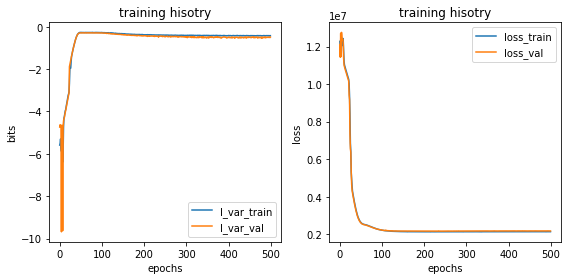

In [29]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [30]:
model.history['loss'][-1]/1e6

2.136425

In [31]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [32]:
theta

array([[ 0.07332493, -0.42112604, -0.40817007, ..., -0.50998074,
        -0.45191208, -0.35173866],
       [-0.20374195, -0.3413182 , -0.17534943, ...,  0.13385847,
        -0.2894721 , -0.11654371],
       [-0.11024006, -0.50448066, -0.11787553, ..., -0.07420228,
        -0.45009518, -0.36204743],
       ...,
       [ 0.25595808, -0.14360227, -0.40152752, ..., -0.07976093,
         0.7355674 , -0.04013018],
       [-0.4329779 , -0.04073538,  0.11658787, ..., -0.23601349,
        -0.03560562,  0.0447957 ],
       [ 0.34006986,  0.4680623 ,  0.17740054, ..., -0.06794431,
         0.08694063,  0.38749093]], dtype=float32)

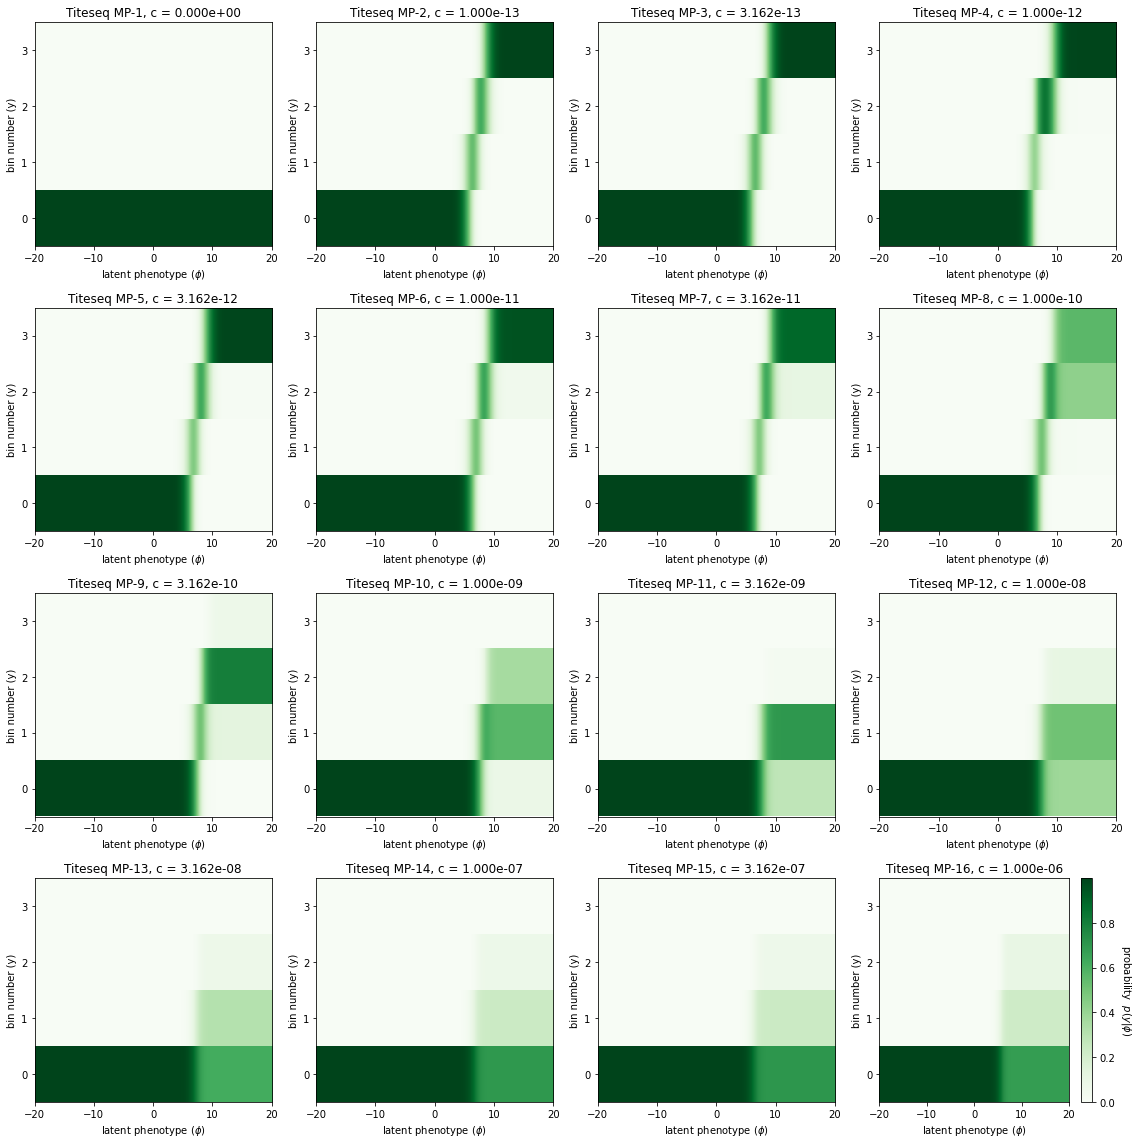

In [50]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-20, 20]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, c = {cs[mp_counter]:.3e}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig('ace2rbd_Titeseq_measurment_prcoess.png',dpi=300,bbox_inches='tight')


In [34]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [35]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [36]:
theta_df = pd.DataFrame(theta,columns=alphabet)

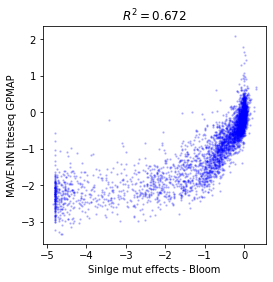

In [37]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [38]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

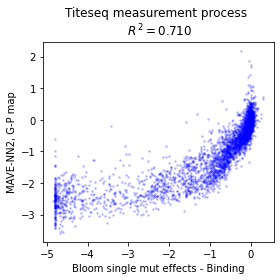

In [39]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

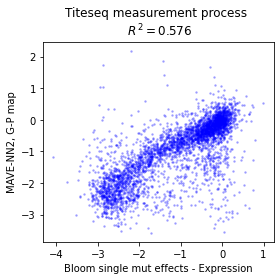

In [40]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

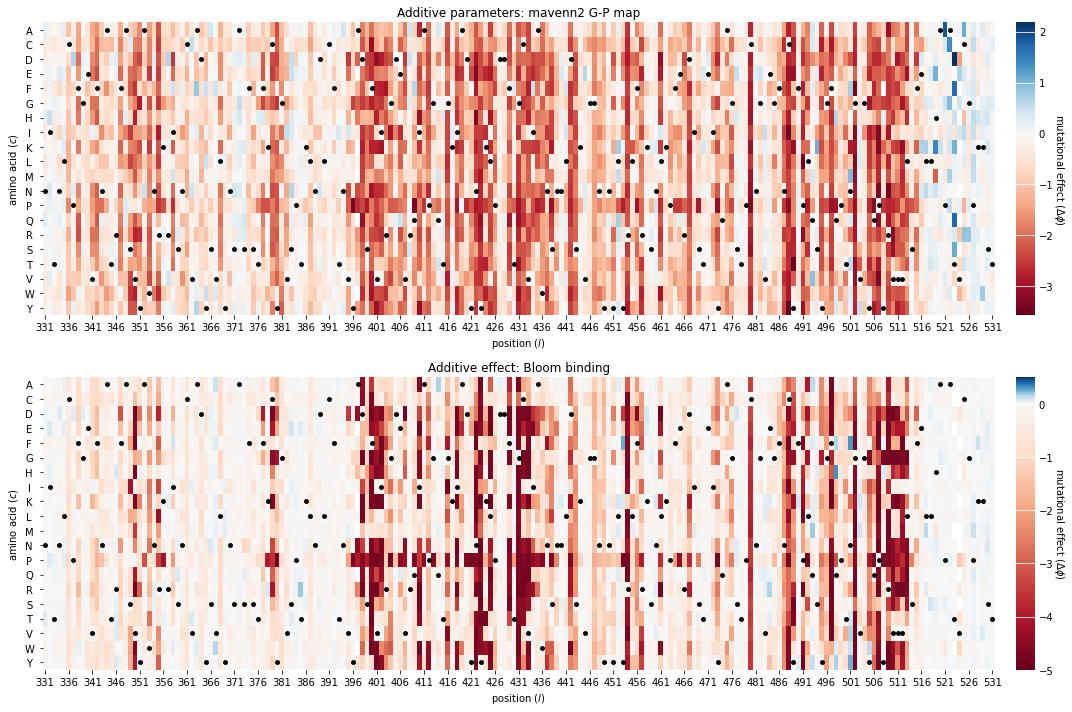

In [41]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

In [42]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')

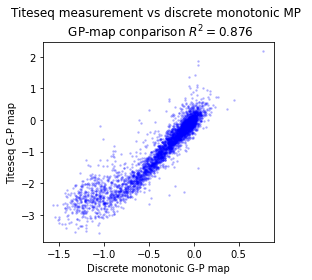

In [43]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Discrete monotonic G-P map')
plt.title(f'Titeseq measurement vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
plt.ylabel('Titeseq G-P map')
plt.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_binding_comparison.png',dpi=200,bbox_inches='tight')

Get titration curves

In [44]:
#phi = gpmap.x_to_phi(x_test)

a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi
    
def Ka_of_c(c, 
            a=a,
            phi=phi,
            mu_neg=mu_neg):

    K_a_of_phi = np.exp(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [45]:
# plt.figure(figsize=(5,5))

# #cs_ = np.arange(0.01,30,0.01)
# cs_bloom = np.arange(10**(-13),10**(-3),10**(-6))

# for _ in np.random.choice(np.arange(0,len(phi)),size=10):
#     plt.plot(cs_bloom,mu_of_phi(c=10**(cs_bloom),phi=phi[_]),'o-')
#     #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
# plt.xlabel('log concentration - grid (inferred)',fontsize=12)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel('$\mu(\phi)$',fontsize=15)
# #plt.ylim(0,4)

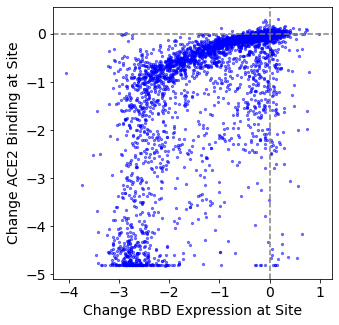

In [46]:
plt.figure(figsize=(5,5))
plt.scatter(bloom_exp_df.values.ravel(),bloom_bind_df.values.ravel(), color='blue',s=5,alpha=0.5)
plt.xlabel('Change RBD Expression at Site',fontsize=14)
plt.ylabel('Change ACE2 Binding at Site',fontsize=14)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.tick_params(labelsize=14)
plt.savefig('Bloom_binding_vs_expression.png',dpi=200,bbox_inches='tight')

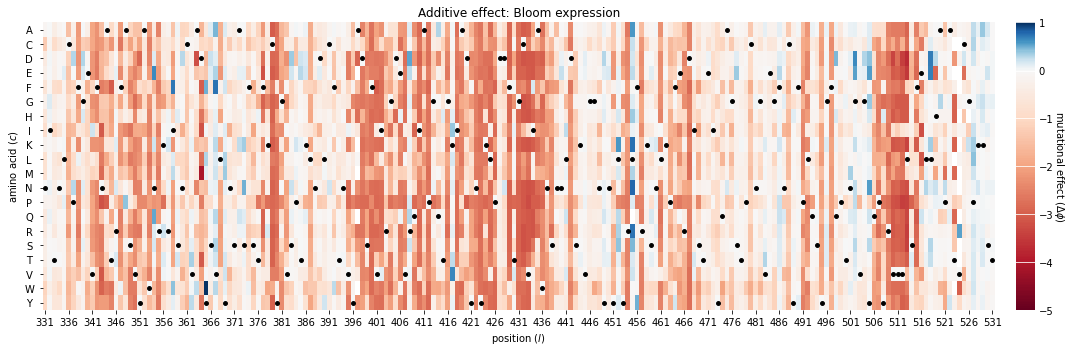

In [47]:

# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))


heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_exp_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,1],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom expression')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_heatmap_bloom_expression.png',dpi=300,bbox_inches='tight')

In [48]:
cs

[0,
 1e-13,
 3.162277660168379e-13,
 1e-12,
 3.1622776601683794e-12,
 1e-11,
 3.1622776601683794e-11,
 1e-10,
 3.1622776601683795e-10,
 1e-09,
 3.1622776601683795e-09,
 1e-08,
 3.162277660168379e-08,
 1e-07,
 3.162277660168379e-07,
 1e-06]